# 1.Consider only the below columns and prepare a prediction model for predicting Price.

Corolla<-Corolla[("Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight")]

In [1]:
import pandas as pd                    #importing essential tools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1.Read the data

In [2]:
cars=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')
cars

Id                                              Model  Price  \
0        1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500   
1        2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750   
2        3      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950   
3        4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950   
4        5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750   
...    ...                                                ...    ...   
1431  1438         TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors   7500   
1432  1439  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...  10845   
1433  1440  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   8500   
1434  1441  TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...   7250   
1435  1442        TOYOTA Corolla 1.6 LB LINEA TERRA 4/5-Doors   6950   

      Age_08_04  Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  \
0            23         10      2002  46986    Diesel   90          1  ...   
1            23         10      2002  72937    Diesel   90          1  ...   
2            24          9      2002  41711    Diesel   90          1  ...   
3            26          7      2002  48000    Diesel   90          0  ...   
4            30          3      2002  38500    Diesel   90          0  ...   
...         ...        ...       ...    ...       ...  ...        ...  ...   
1431         69         12      1998  20544    Petrol   86          1  ...   
1432         72          9      1998  19000    Petrol   86          0  ...   
1433         71         10      1998  17016    Petrol   86          0  ...   
1434         70         11      1998  16916    Petrol   86          1  ...   
1435         76          5      1998      1    Petrol  110          0  ...   

     Central_Lock  Powered_Windows  Power_Steering  Radio  Mistlamps  \
0               1                1               1      0          0   
1               1                0               1      0          0   
2               0                0               1      0          0   
3               0                0               1      0          0   
4               1                1               1      0          1   
...           ...              ...             ...    ...        ...   
1431            1                1               1      0          1   
1432            0                0               1      0          0   
1433            0                0               1      0          0   
1434            0                0               0      0          0   
1435            0                0               1      0          0   

      Sport_Model  Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0               0                 1             0               0        0  
1               0                 1             0               0        0  
2               0                 1             0               0        0  
3               0                 1             0               0        0  
4               0                 1             0               0        0  
...           ...               ...           ...             ...      ...  
1431            1                 1             0               0        0  
1432            1                 1             0               0        0  
1433            0                 1             0               0        0  
1434            0                 1             0               0        0  
1435            0                 0             0               0        0  

[1436 rows x 38 columns]

2.Segregating the essential data

In [3]:
corolla=cars[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight","Price"]]
corolla

Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight  Price
0            23  46986   90  2000      3      5            210    1165  13500
1            23  72937   90  2000      3      5            210    1165  13750
2            24  41711   90  2000      3      5            210    1165  13950
3            26  48000   90  2000      3      5            210    1165  14950
4            30  38500   90  2000      3      5            210    1170  13750
...         ...    ...  ...   ...    ...    ...            ...     ...    ...
1431         69  20544   86  1300      3      5             69    1025   7500
1432         72  19000   86  1300      3      5             69    1015  10845
1433         71  17016   86  1300      3      5             69    1015   8500
1434         70  16916   86  1300      3      5             69    1015   7250
1435         76      1  110  1600      5      5             19    1114   6950

[1436 rows x 9 columns]

3.Finding the co-relation

In [4]:
corolla.corr()

Age_08_04        KM        HP        cc     Doors     Gears  \
Age_08_04       1.000000  0.505672 -0.156622 -0.098084 -0.148359 -0.005364   
KM              0.505672  1.000000 -0.333538  0.102683 -0.036197  0.015023   
HP             -0.156622 -0.333538  1.000000  0.035856  0.092424  0.209477   
cc             -0.098084  0.102683  0.035856  1.000000  0.079903  0.014629   
Doors          -0.148359 -0.036197  0.092424  0.079903  1.000000 -0.160141   
Gears          -0.005364  0.015023  0.209477  0.014629 -0.160141  1.000000   
Quarterly_Tax  -0.198431  0.278165 -0.298432  0.306996  0.109363 -0.005452   
Weight         -0.470253 -0.028598  0.089614  0.335637  0.302618  0.020613   
Price          -0.876590 -0.569960  0.314990  0.126389  0.185326  0.063104   

               Quarterly_Tax    Weight     Price  
Age_08_04          -0.198431 -0.470253 -0.876590  
KM                  0.278165 -0.028598 -0.569960  
HP                 -0.298432  0.089614  0.314990  
cc                  0.306996  0.335637  0.126389  
Doors               0.109363  0.302618  0.185326  
Gears              -0.005452  0.020613  0.063104  
Quarterly_Tax       1.000000  0.626134  0.219197  
Weight              0.626134  1.000000  0.581198  
Price               0.219197  0.581198  1.000000

4.Performing EDA

In [8]:
corolla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age_08_04      1436 non-null   int64
 1   KM             1436 non-null   int64
 2   HP             1436 non-null   int64
 3   cc             1436 non-null   int64
 4   Doors          1436 non-null   int64
 5   Gears          1436 non-null   int64
 6   Quarterly_Tax  1436 non-null   int64
 7   Weight         1436 non-null   int64
 8   Price          1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:
corolla.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1431    False
1432    False
1433    False
1434    False
1435    False
Length: 1436, dtype: bool

In [10]:
corolla[corolla.duplicated()]

Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight  Price
113          8  13253  116  2000      5      5            234    1320  24950

In [22]:
corolla.drop_duplicates(inplace=True)
corolla

C:\Users\sreen\AppData\Local\Temp\ipykernel_12208\889416188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corolla.drop_duplicates(inplace=True)


Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight  Price
0            23  46986   90  2000      3      5            210    1165  13500
1            23  72937   90  2000      3      5            210    1165  13750
2            24  41711   90  2000      3      5            210    1165  13950
3            26  48000   90  2000      3      5            210    1165  14950
4            30  38500   90  2000      3      5            210    1170  13750
...         ...    ...  ...   ...    ...    ...            ...     ...    ...
1431         69  20544   86  1300      3      5             69    1025   7500
1432         72  19000   86  1300      3      5             69    1015  10845
1433         71  17016   86  1300      3      5             69    1015   8500
1434         70  16916   86  1300      3      5             69    1015   7250
1435         76      1  110  1600      5      5             19    1114   6950

[1435 rows x 9 columns]

In [24]:
corolla.reset_index(drop=True,inplace=True)
corolla

Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight  Price
0            23  46986   90  2000      3      5            210    1165  13500
1            23  72937   90  2000      3      5            210    1165  13750
2            24  41711   90  2000      3      5            210    1165  13950
3            26  48000   90  2000      3      5            210    1165  14950
4            30  38500   90  2000      3      5            210    1170  13750
...         ...    ...  ...   ...    ...    ...            ...     ...    ...
1430         69  20544   86  1300      3      5             69    1025   7500
1431         72  19000   86  1300      3      5             69    1015  10845
1432         71  17016   86  1300      3      5             69    1015   8500
1433         70  16916   86  1300      3      5             69    1015   7250
1434         76      1  110  1600      5      5             19    1114   6950

[1435 rows x 9 columns]

In [25]:
corolla.isnull()

Age_08_04     KM     HP     cc  Doors  Gears  Quarterly_Tax  Weight  \
0         False  False  False  False  False  False          False   False   
1         False  False  False  False  False  False          False   False   
2         False  False  False  False  False  False          False   False   
3         False  False  False  False  False  False          False   False   
4         False  False  False  False  False  False          False   False   
...         ...    ...    ...    ...    ...    ...            ...     ...   
1430      False  False  False  False  False  False          False   False   
1431      False  False  False  False  False  False          False   False   
1432      False  False  False  False  False  False          False   False   
1433      False  False  False  False  False  False          False   False   
1434      False  False  False  False  False  False          False   False   

      Price  
0     False  
1     False  
2     False  
3     False  
4     False  
...     ...  
1430  False  
1431  False  
1432  False  
1433  False  
1434  False  

[1435 rows x 9 columns]

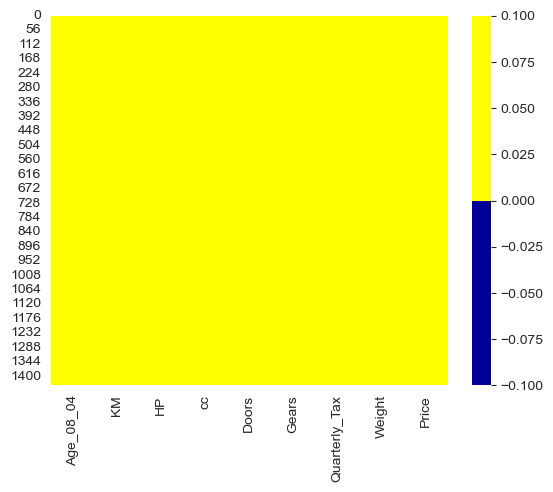

In [27]:
colours = ['#000099', '#ffff00'] 
pal = sns.color_palette(colours)
sns.heatmap(corolla.isnull(), cmap=pal)
plt.show()

<Axes: >

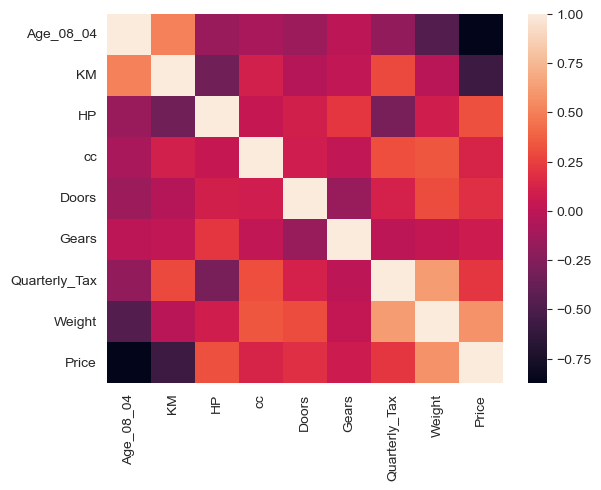

In [13]:
sns.heatmap(corolla1.corr())

Scatterplot to find corelation

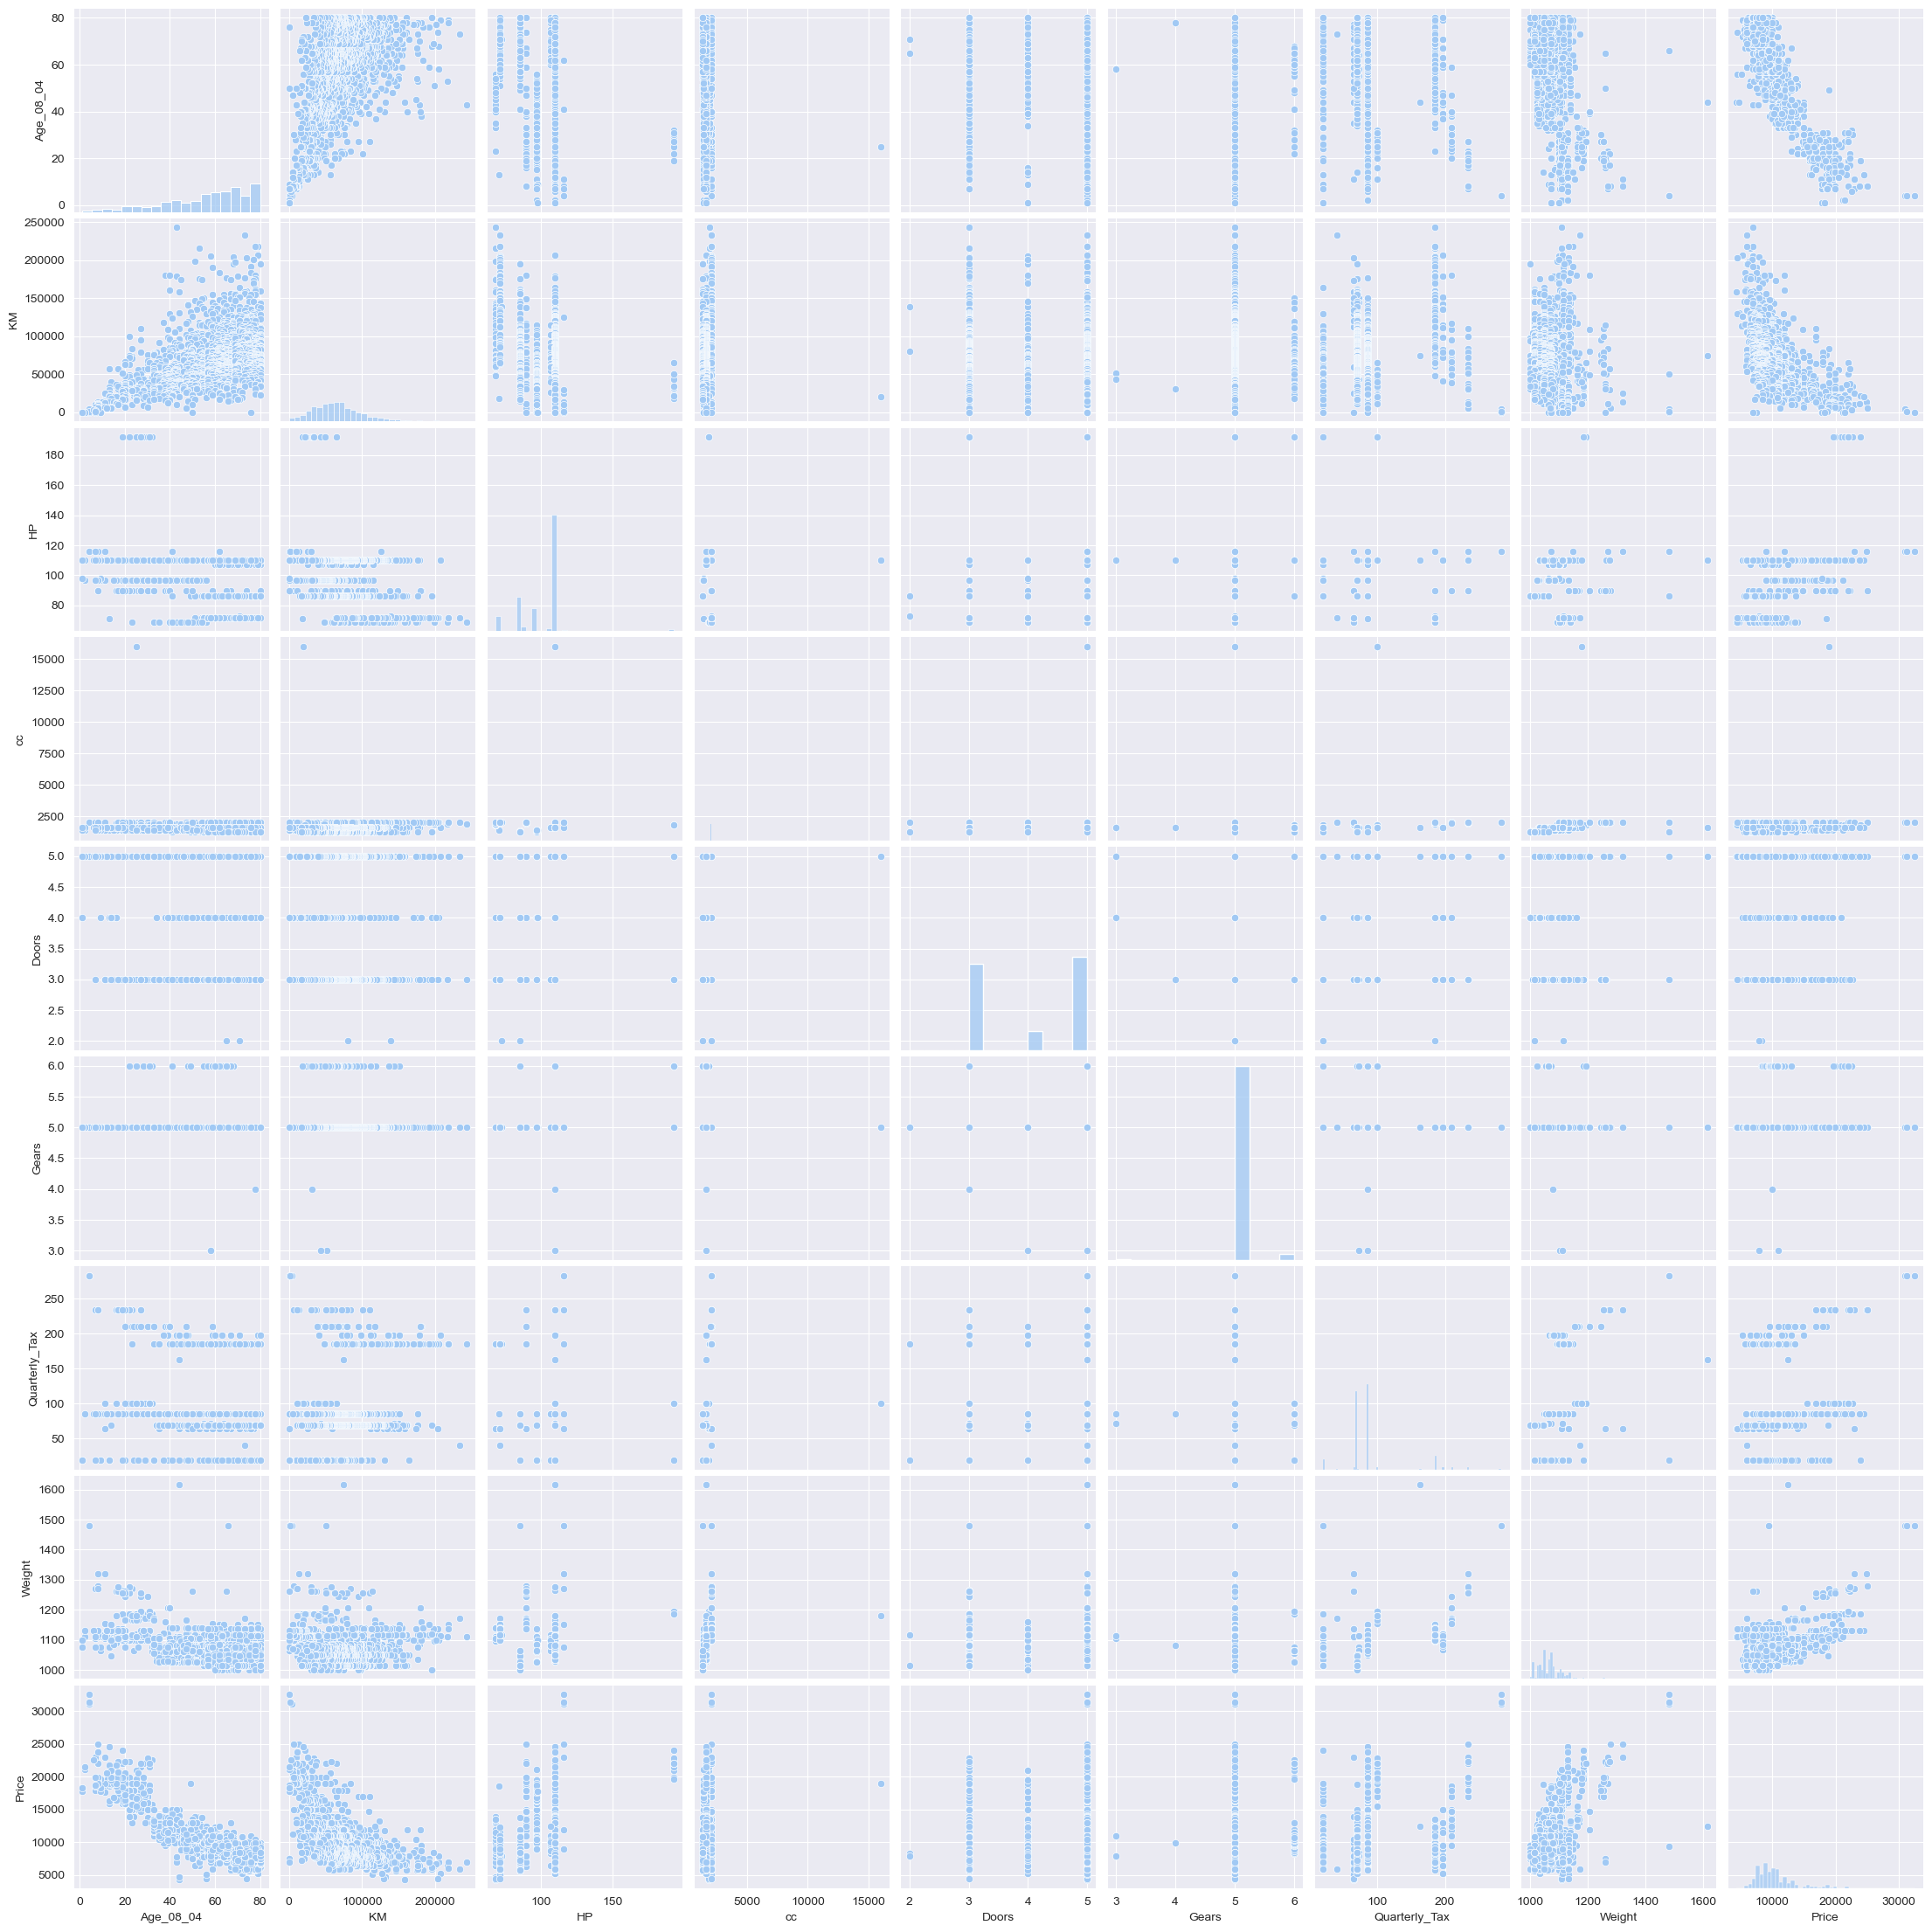

In [14]:
sns.set_palette('pastel')
sns.set_style(style='darkgrid')
sns.pairplot(corolla1)
plt.show()

In [28]:
corolla.describe()

Age_08_04             KM           HP            cc        Doors  \
count  1435.000000    1435.000000  1435.000000   1435.000000  1435.000000   
mean     55.980488   68571.782578   101.491986   1576.560976     4.032753   
std      18.563312   37491.094553    14.981408    424.387533     0.952667   
min       1.000000       1.000000    69.000000   1300.000000     2.000000   
25%      44.000000   43000.000000    90.000000   1400.000000     3.000000   
50%      61.000000   63451.000000   110.000000   1600.000000     4.000000   
75%      70.000000   87041.500000   110.000000   1600.000000     5.000000   
max      80.000000  243000.000000   192.000000  16000.000000     5.000000   

             Gears  Quarterly_Tax       Weight         Price  
count  1435.000000    1435.000000  1435.000000   1435.000000  
mean      5.026481      87.020209  1072.287108  10720.915679  
std       0.188575      40.959588    52.251882   3608.732978  
min       3.000000      19.000000  1000.000000   4350.000000  
25%       5.000000      69.000000  1040.000000   8450.000000  
50%       5.000000      85.000000  1070.000000   9900.000000  
75%       5.000000      85.000000  1085.000000  11950.000000  
max       6.000000     283.000000  1615.000000  32500.000000

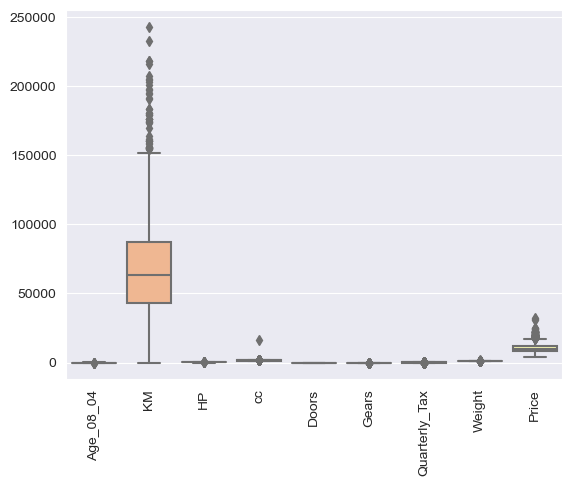

In [32]:
box=sns.boxplot(data=corolla)
plt.xticks(rotation=90)
plt.show()

In [7]:
##Preparing a model

In [35]:
#Build a model
import statsmodels.formula.api as smf
model=smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit()

In [36]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        11:05:45   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
Age_08_04      -121.7139      2.615    -46.552      0.000    -126.843    -116.585
KM               -0.0207      0.001    -16.552      0.000      -0.023      -0.018
HP               31.5846      2.818     11.210      0.000      26.058      37.112
cc               -0.1186      0.090     -1.316      0.188      -0.295       0.058
Doors            -0.9202     39.988     -0.023      0.982     -79.362      77.522
Gears           597.7159    196.969      3.035      0.002     211.335     984.097
Quarterly_Tax     3.8588      1.311      2.944      0.003       1.288       6.430
Weight           16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
#Model Params
model.params

Intercept       -5472.540368
Age_08_04        -121.713891
KM                 -0.020737
HP                 31.584612
cc                 -0.118558
Doors              -0.920189
Gears             597.715894
Quarterly_Tax       3.858805
Weight             16.855470
dtype: float64

In [40]:
#t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept        -3.875273
Age_08_04       -46.551876
KM              -16.552424
HP               11.209719
cc               -1.316436
Doors            -0.023012
Gears             3.034563
Quarterly_Tax     2.944198
Weight           15.760663
dtype: float64 
 Intercept         1.113392e-04
Age_08_04        1.879217e-288
KM                1.994713e-56
HP                5.211155e-28
cc                1.882393e-01
Doors             9.816443e-01
Gears             2.452430e-03
Quarterly_Tax     3.290363e-03
Weight            1.031118e-51
dtype: float64


In [41]:
(model.rsquared,model.rsquared_adj)

(0.8625200256947001, 0.8617487495415147)

Build Simple Linear Regression model

In [42]:
c_c=smf.ols('Price~cc',data=corolla).fit()
c_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     22.52
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           2.29e-06
Time:                        11:20:21   Log-Likelihood:                -13779.
No. Observations:                1435   AIC:                         2.756e+04
Df Residuals:                    1433   BIC:                         2.757e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9053.5368    363.894     24.880      0.000    8339.715    9767.359
cc             1.0576      0.223      4.745      0.000       0.620       1.495
==============================================================================
Omnibus:                      463.846   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1386.822
Skew:                           1.645   Prob(JB):                    7.17e-302
Kurtosis:                       6.518   Cond. No.                     6.28e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.28e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
c_d=smf.ols('Price~Doors',data=corolla).fit()
c_d.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     49.99
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           2.40e-12
Time:                        11:21:32   Log-Likelihood:                -13765.
No. Observations:                1435   AIC:                         2.753e+04
Df Residuals:                    1433   BIC:                         2.755e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7916.1452    407.596     19.422      0.000    7116.596    8715.694
Doors        695.4978     98.366      7.071      0.000     502.541     888.454
==============================================================================
Omnibus:                      465.543   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1403.980
Skew:                           1.647   Prob(JB):                    1.35e-305
Kurtosis:                       6.554   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
c_cd=smf.ols('Price~cc+Doors',data=corolla).fit()
c_cd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     34.40
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           2.55e-15
Time:                        11:23:13   Log-Likelihood:                -13756.
No. Observations:                1435   AIC:                         2.752e+04
Df Residuals:                    1432   BIC:                         2.753e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   6568.3395    513.700     12.786      0.000    5560.655    7576.024
cc             0.9398      0.220      4.268      0.000       0.508       1.372
Doors        662.3187     98.089      6.752      0.000     469.906     854.732
==============================================================================
Omnibus:                      448.494   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1297.612
Skew:                           1.602   Prob(JB):                    1.69e-282
Kurtosis:                       6.382   Cond. No.                     9.09e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [59]:
#Calculate VIF
rsq_Age_08_04=smf.ols('Age_08_04~KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared
vif_Age_08_04=1/(1-rsq_Age_08_04) #1.8762358497682892
rsq_KM=smf.ols('KM~Age_08_04+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared
vif_KM=1/(1-rsq_KM) #1.7571780239810395
rsq_HP=smf.ols('HP~Age_08_04+KM+cc+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared
vif_HP=1/(1-rsq_HP) #1.419180108718214
rsq_cc=smf.ols('cc~Age_08_04+HP+KM+Doors+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared
vif_cc=1/(1-rsq_cc) #1.1634703645940854
rsq_Doors=smf.ols('Doors~Age_08_04+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=corolla).fit().rsquared
vif_Doors=1/(1-rsq_Doors) #1.155889865814207
rsq_Gears=smf.ols('Gears~Age_08_04+HP+cc+Doors+Quarterly_Tax+Weight+KM',data=corolla).fit().rsquared
vif_Gears=1/(1-rsq_Gears) #1.0927433308026397
rsq_Quarterly_Tax=smf.ols('Quarterly_Tax~Age_08_04+KM+cc+Doors+Gears+Weight+HP',data=corolla).fit().rsquared
vif_Quarterly_Tax=1/(1-rsq_Quarterly_Tax) #1.968854016996854
rsq_Weight=smf.ols('Weight~cc+Age_08_04+HP+KM+Doors+Gears+Quarterly_Tax',data=corolla).fit().rsquared
vif_Weight=1/(1-rsq_Weight) #1.1634703645940854

#VIF in DF
dic={'Variables':['Age_08_04','KM','HP','cc','Doors','Gears','Quarterly_Tax','Weight'],'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_Doors,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
vif_corolladf=pd.DataFrame(dic)
vif_corolladf


Variables       VIF
0      Age_08_04  1.876236
1             KM  1.757178
2             HP  1.419180
3             cc  1.163470
4          Doors  1.155890
5          Gears  1.098843
6  Quarterly_Tax  2.295375
7         Weight  2.487180

Test for Residual Analysis ;
Test for Normality of Residuals (Q-Q Plot)

In [60]:
model.resid

0      -3291.958871
1      -2503.800414
2      -2829.635210
3      -1455.789389
4      -2450.217277
           ...     
1430   -1294.255037
1431    2552.422658
1432      44.565598
1433   -1329.222041
1434   -3446.087526
Length: 1435, dtype: float64

Check for Residuals

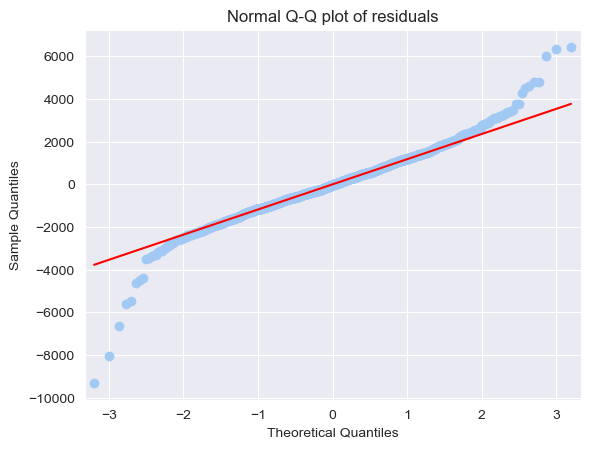

In [61]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [62]:
list(np.where(model.resid>6000))

[array([109, 146, 522], dtype=int64)]

In [64]:
list(np.where(model.resid<-6000))

[array([220, 600, 959], dtype=int64)]

Residual plot for Homosedasticity

In [65]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

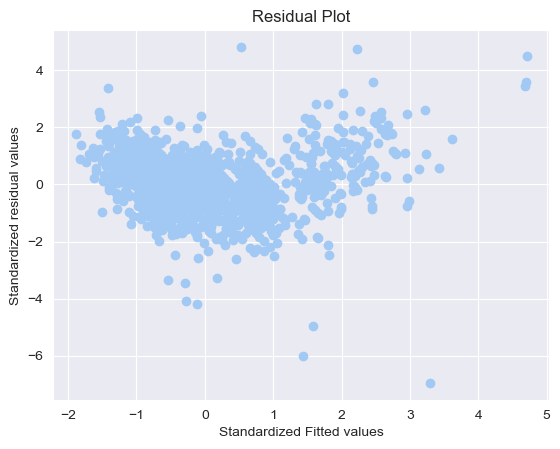

In [66]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Residual vs Regressors

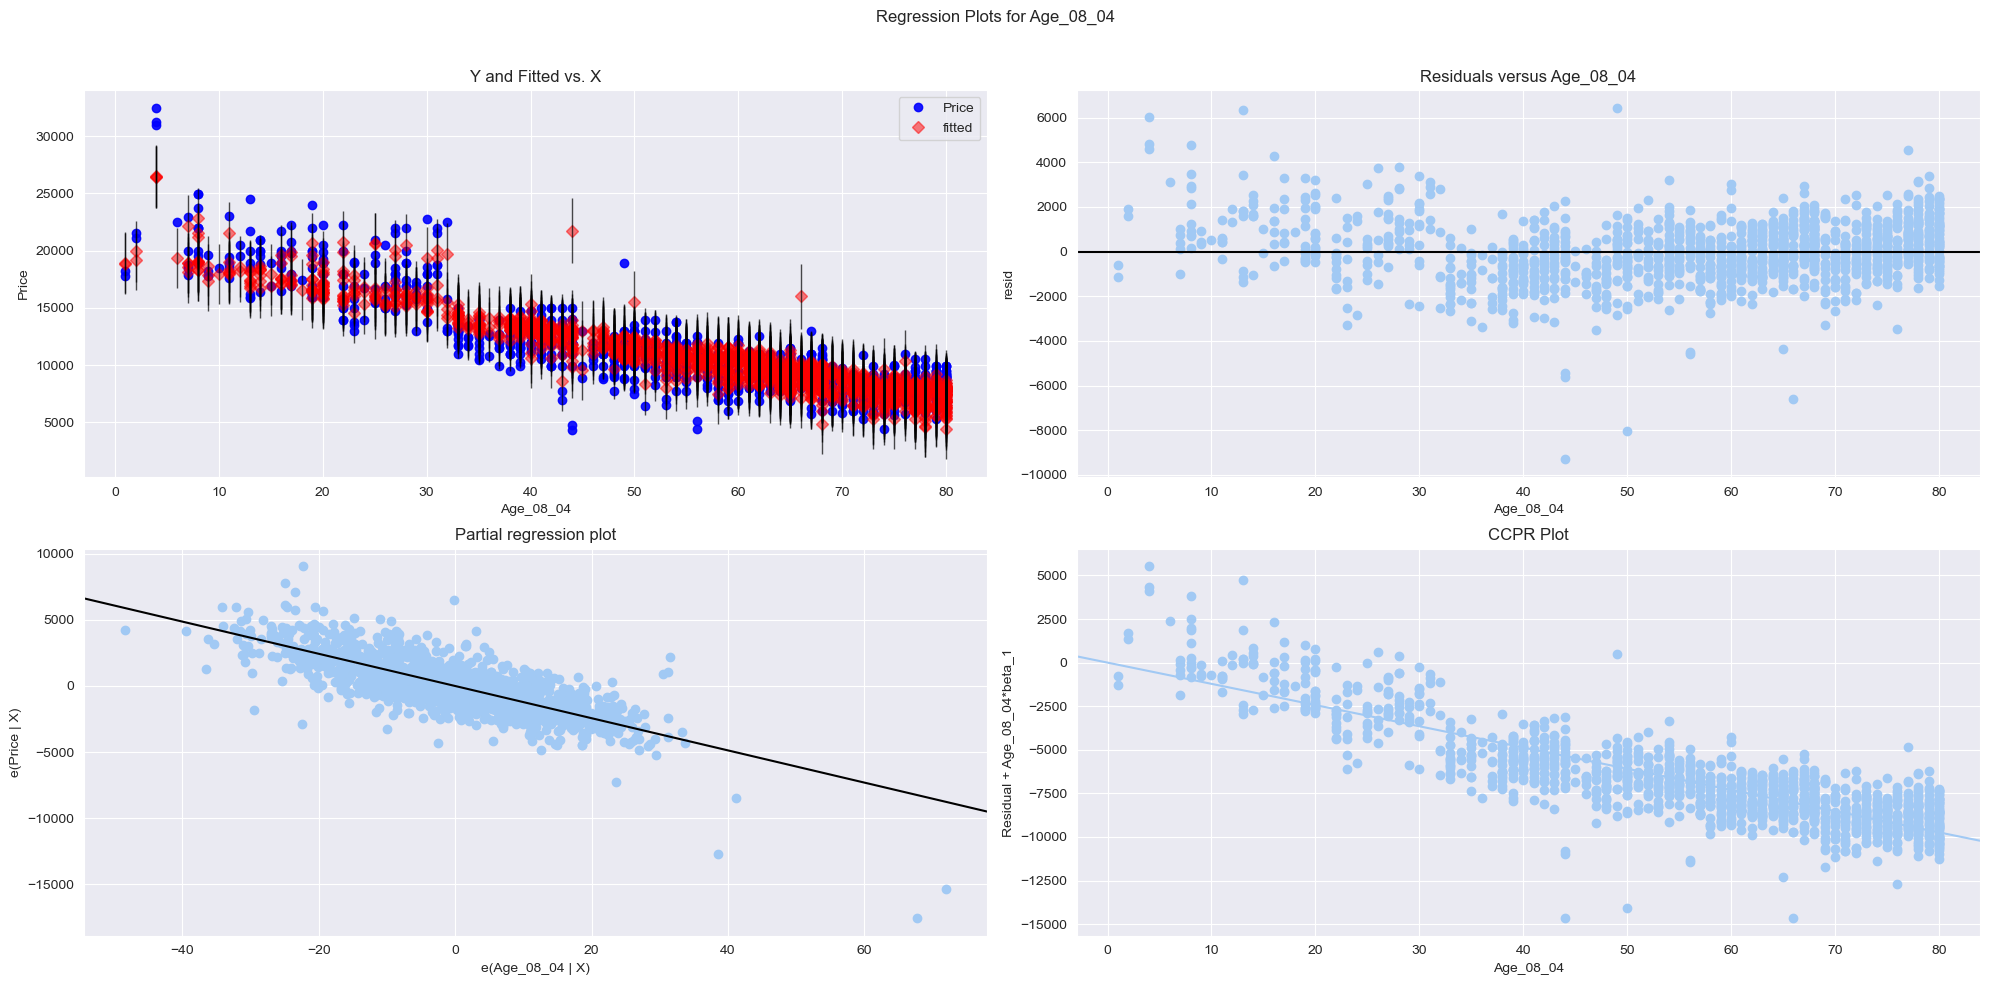

In [67]:
fig=plt.figure(figsize=(20,10))
fig=sm.graphics.plot_regress_exog(model,'Age_08_04',fig=fig)
plt.show()

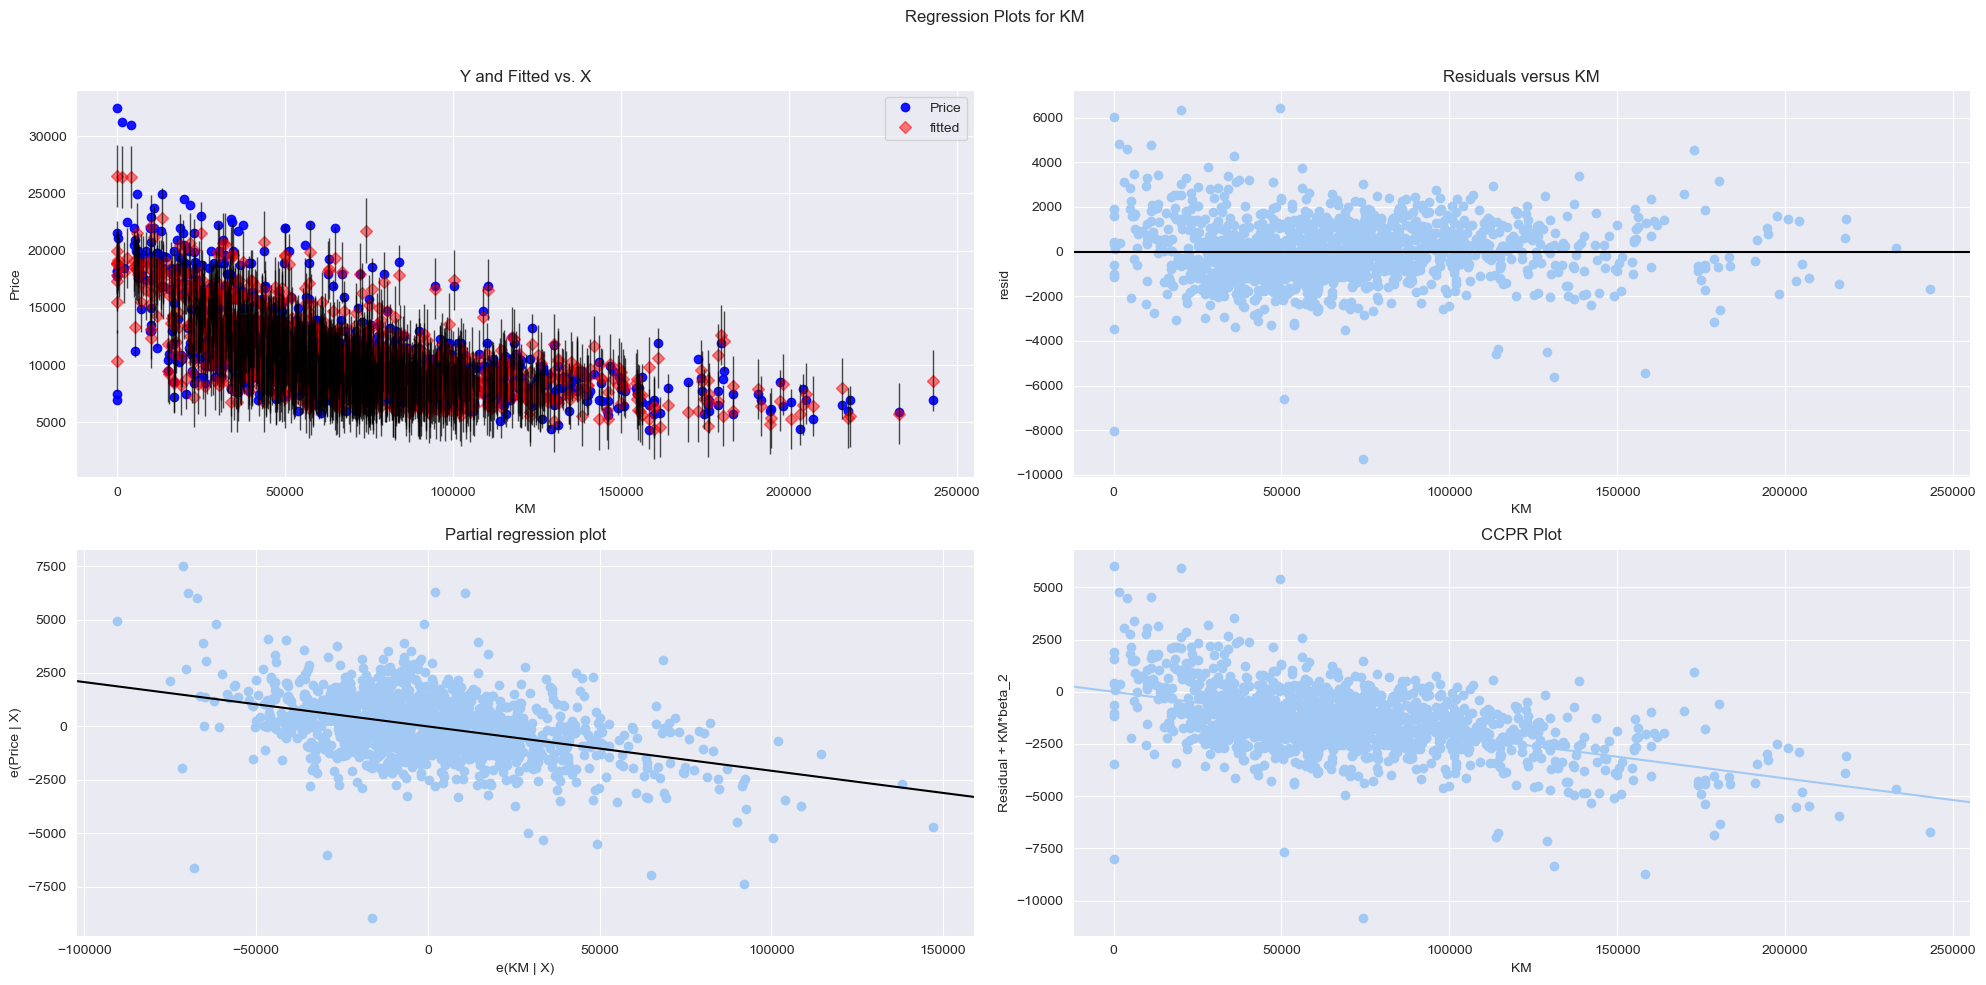

In [68]:
fig=plt.figure(figsize=(20,10))
fig=sm.graphics.plot_regress_exog(model,'KM',fig=fig)
plt.show()

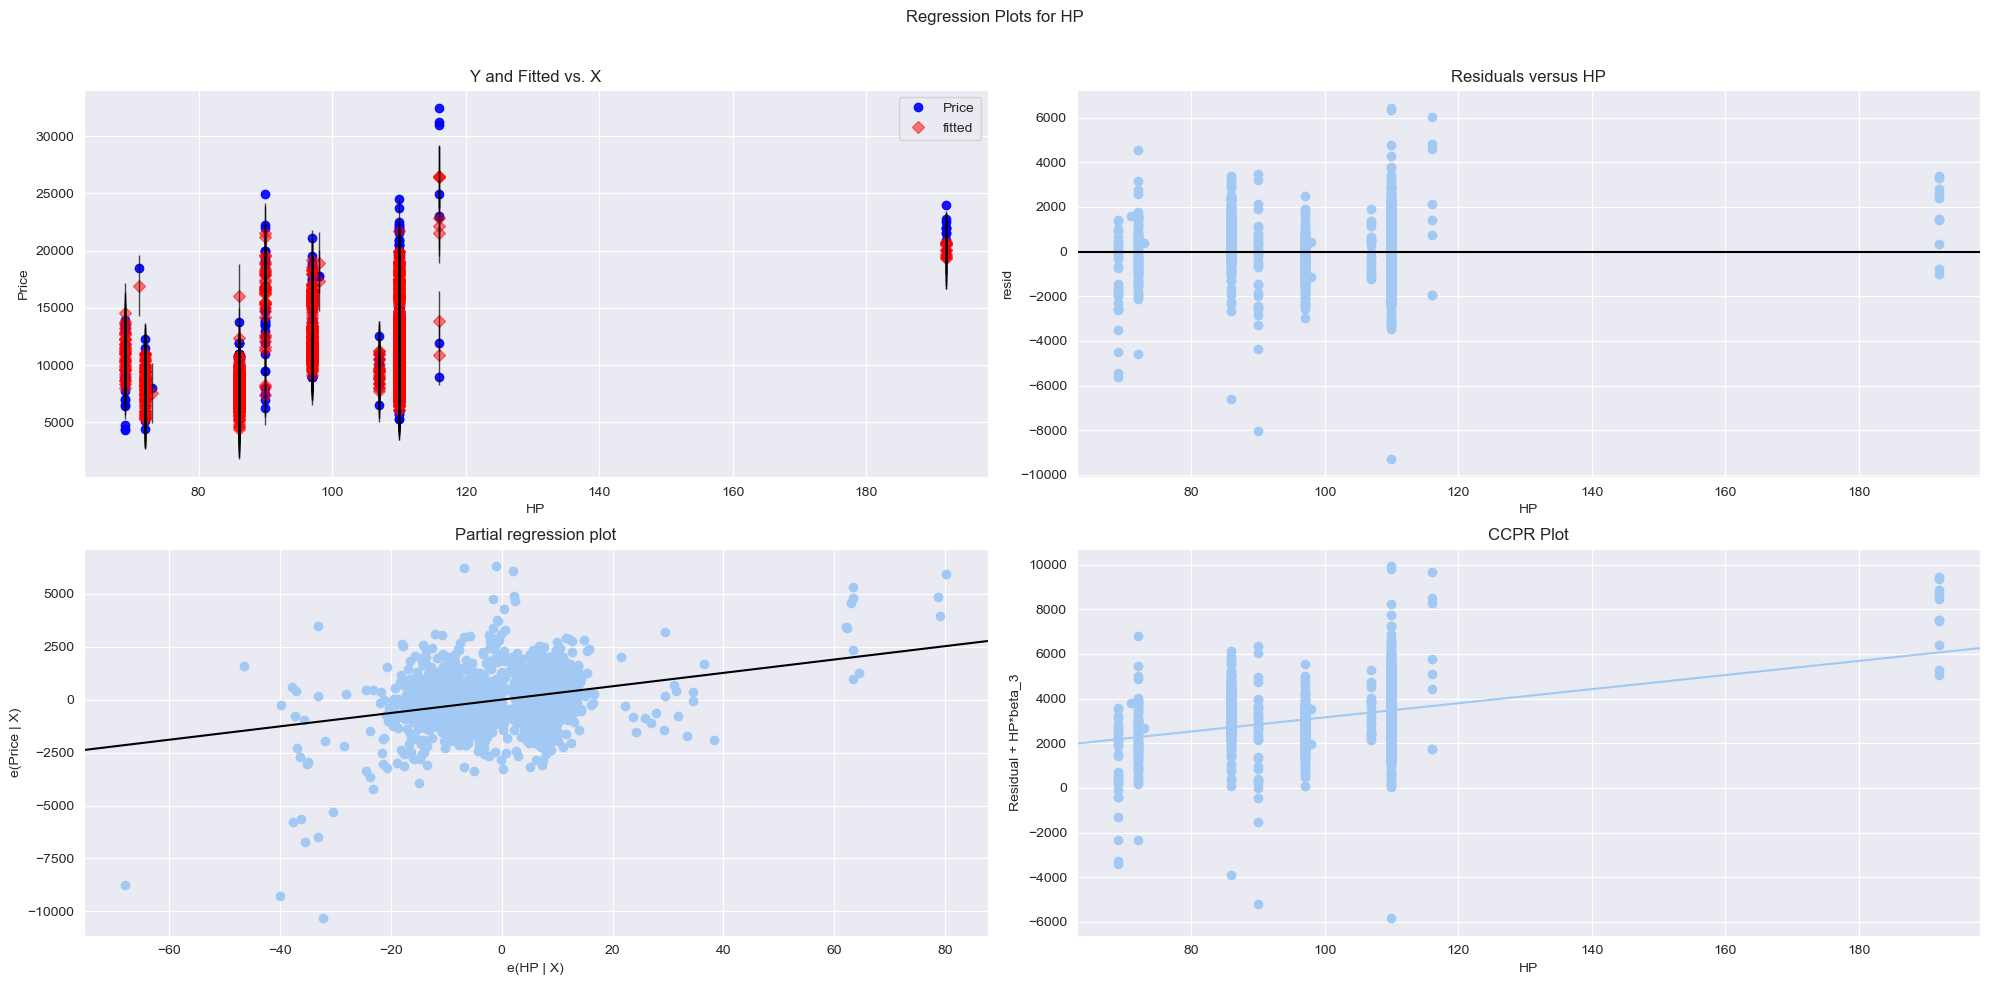

In [69]:
fig=plt.figure(figsize=(20,10))
fig=sm.graphics.plot_regress_exog(model,'HP',fig=fig)
plt.show()

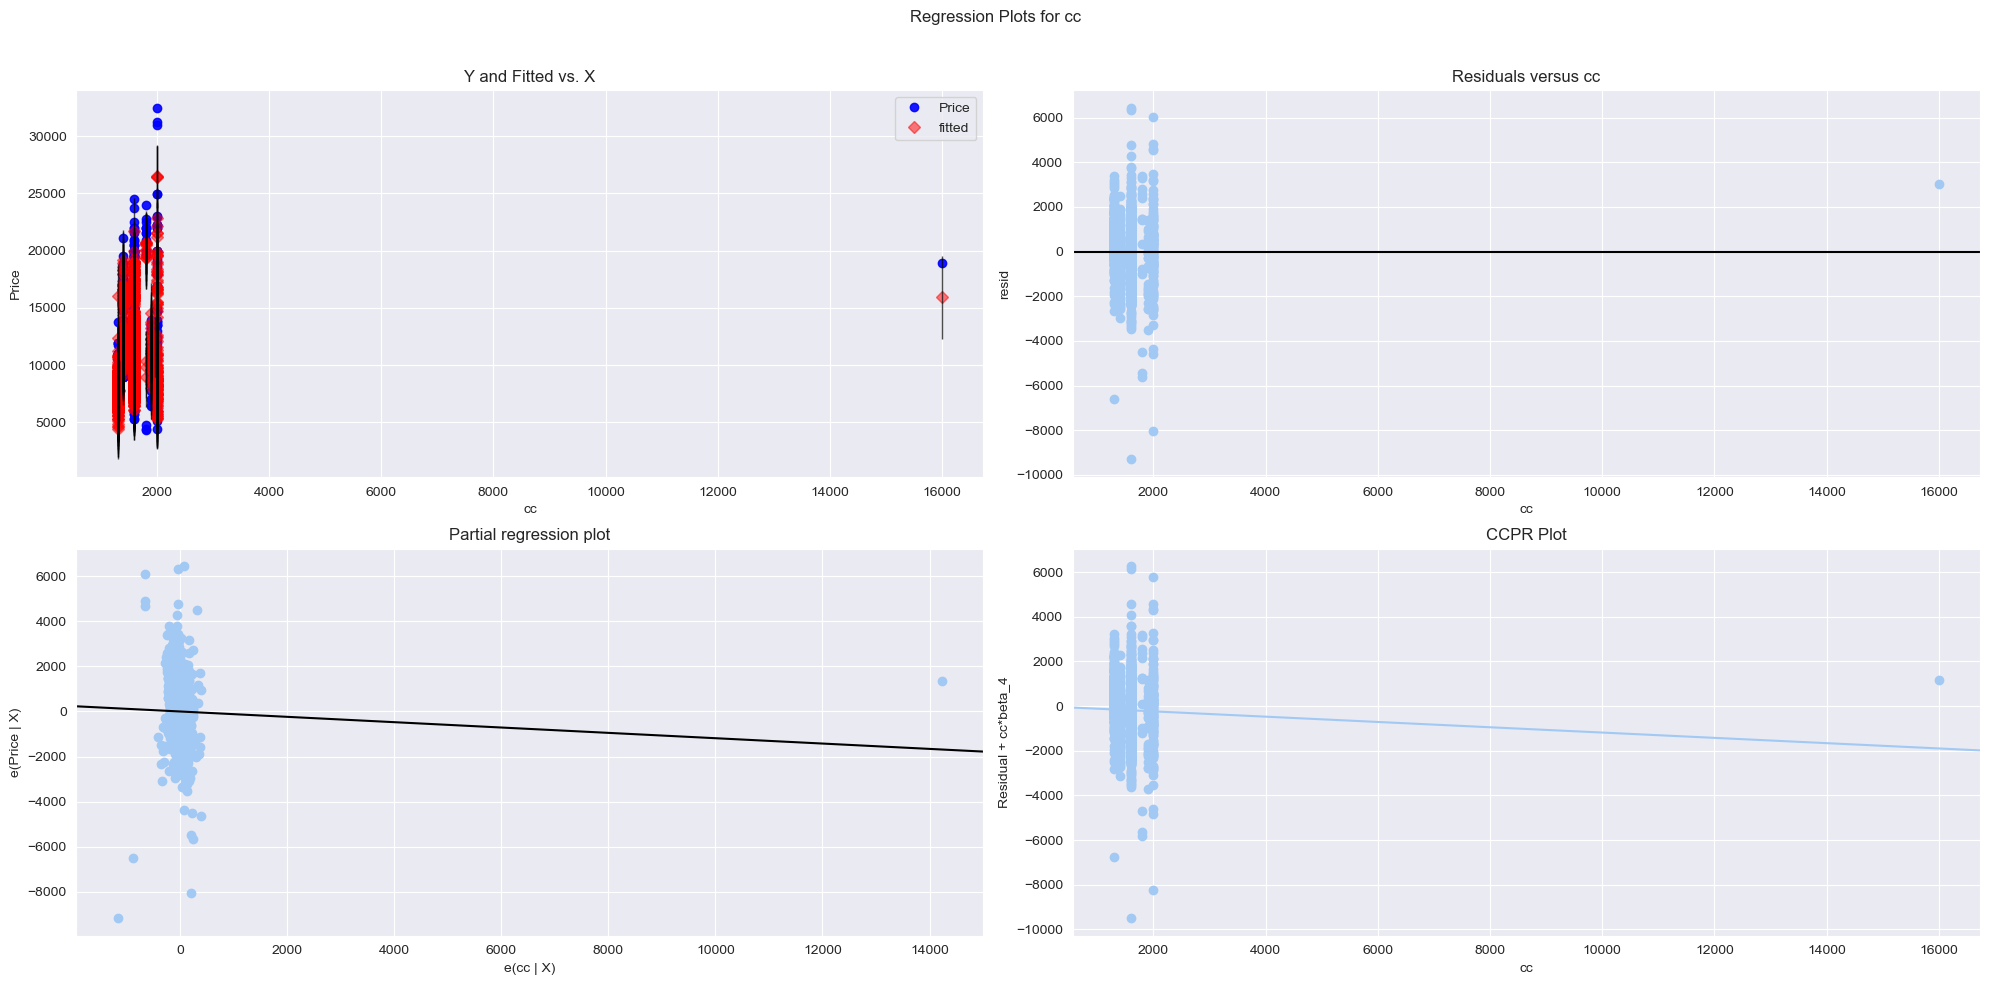

In [70]:
fig=plt.figure(figsize=(20,10))
fig=sm.graphics.plot_regress_exog(model,'cc',fig=fig)
plt.show()

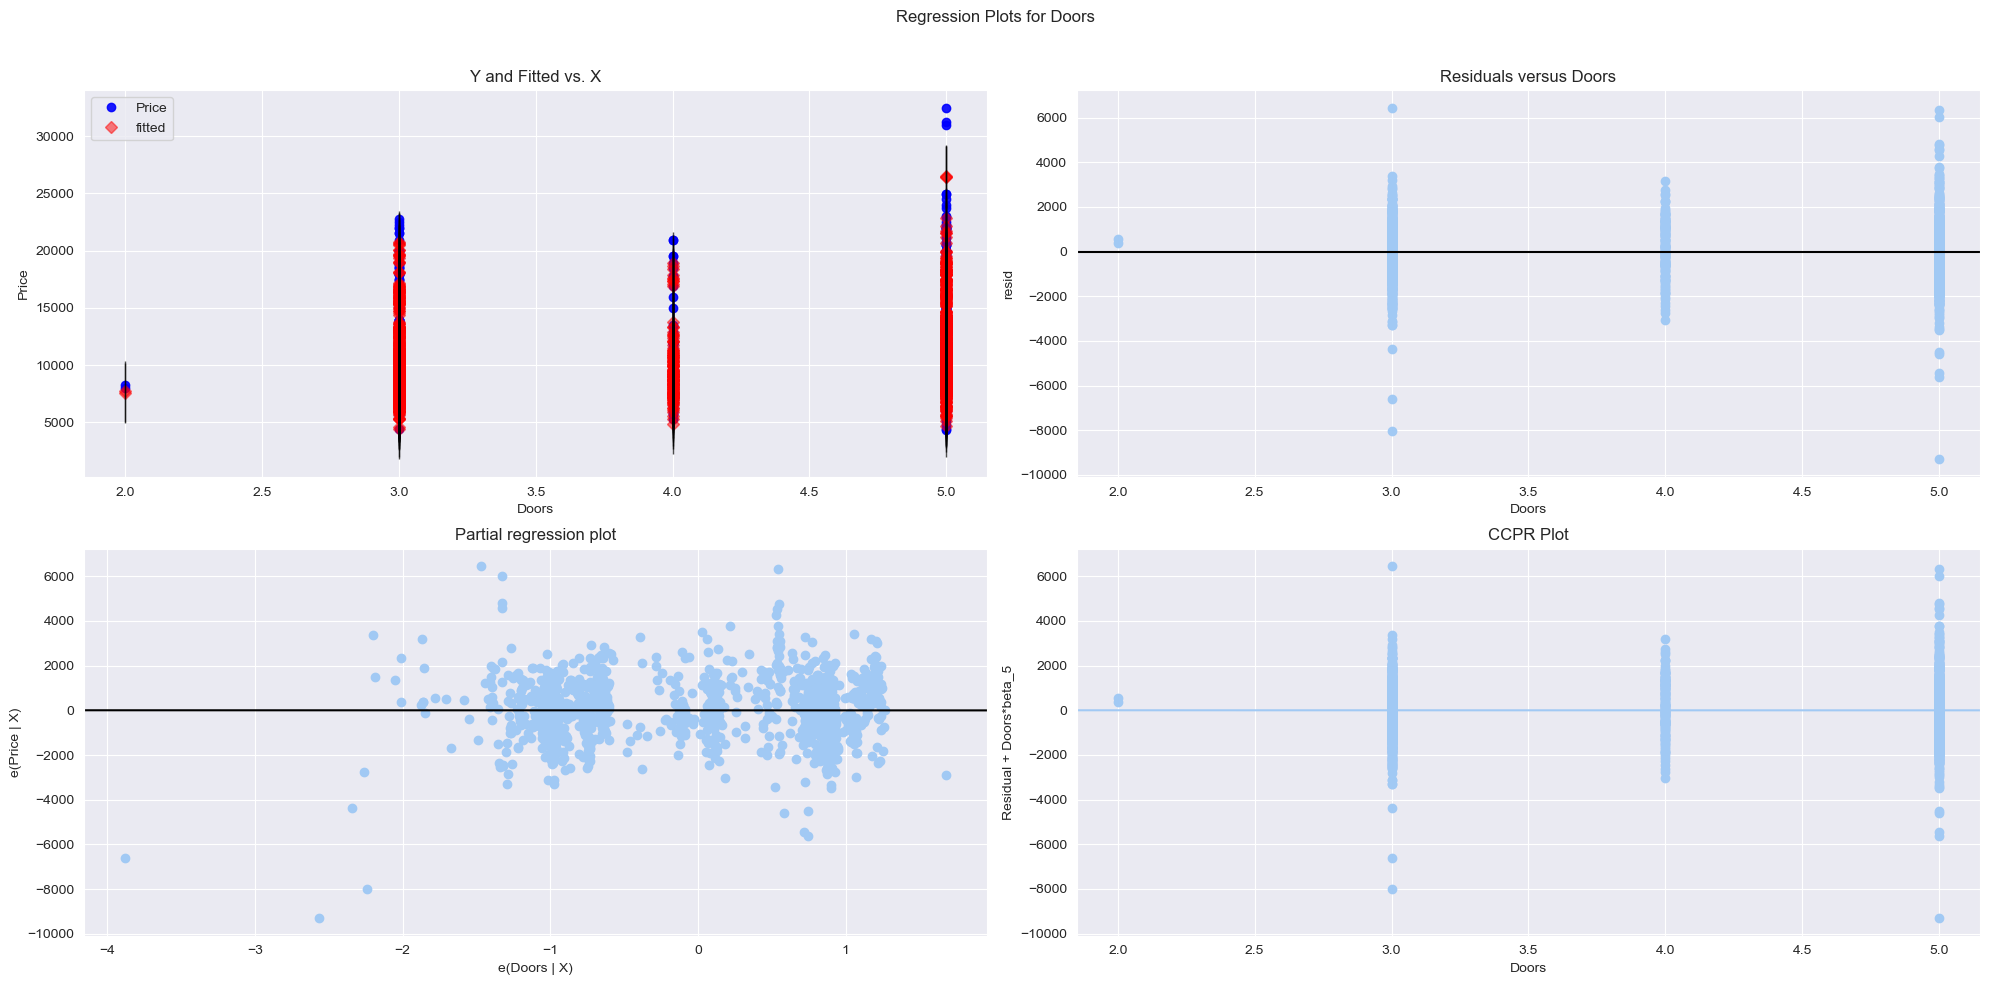

In [71]:
fig=plt.figure(figsize=(20,10))
fig=sm.graphics.plot_regress_exog(model,'Doors',fig=fig)
plt.show()

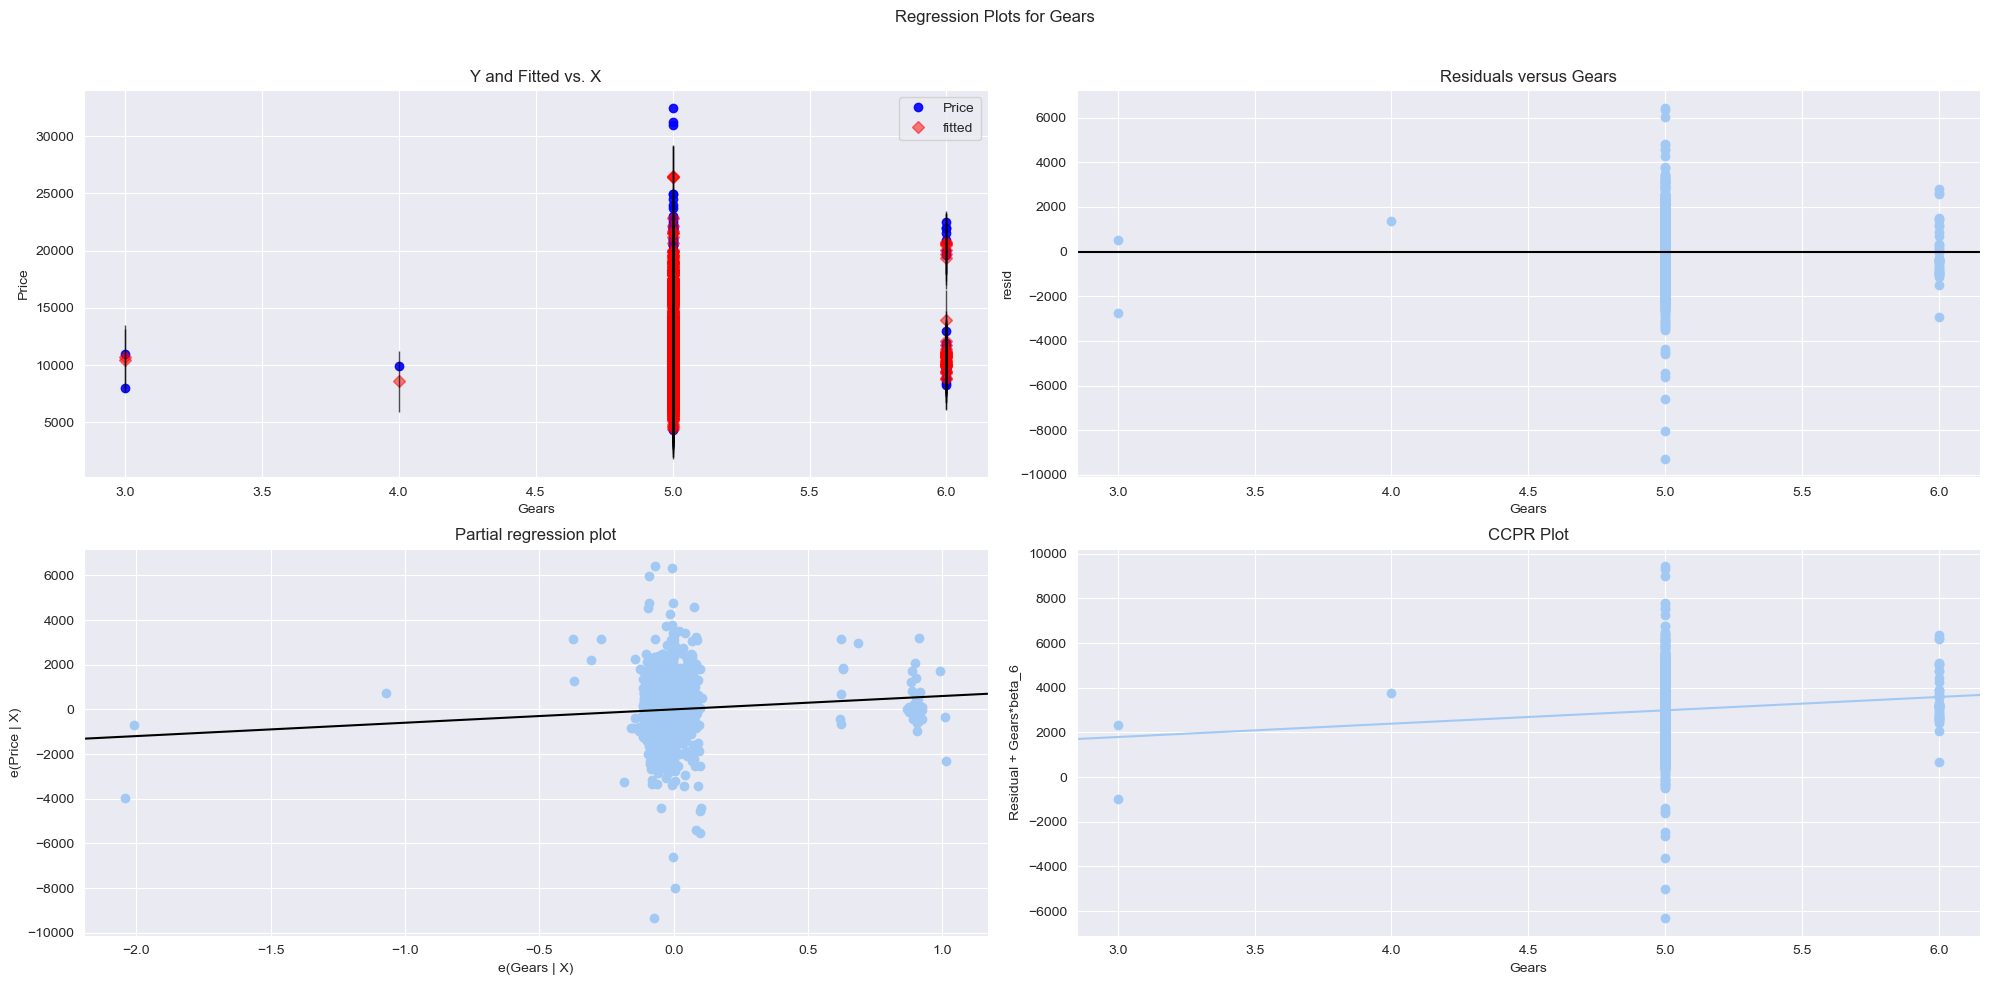

In [72]:
fig=plt.figure(figsize=(20,10))
fig=sm.graphics.plot_regress_exog(model,'Gears',fig=fig)
plt.show()

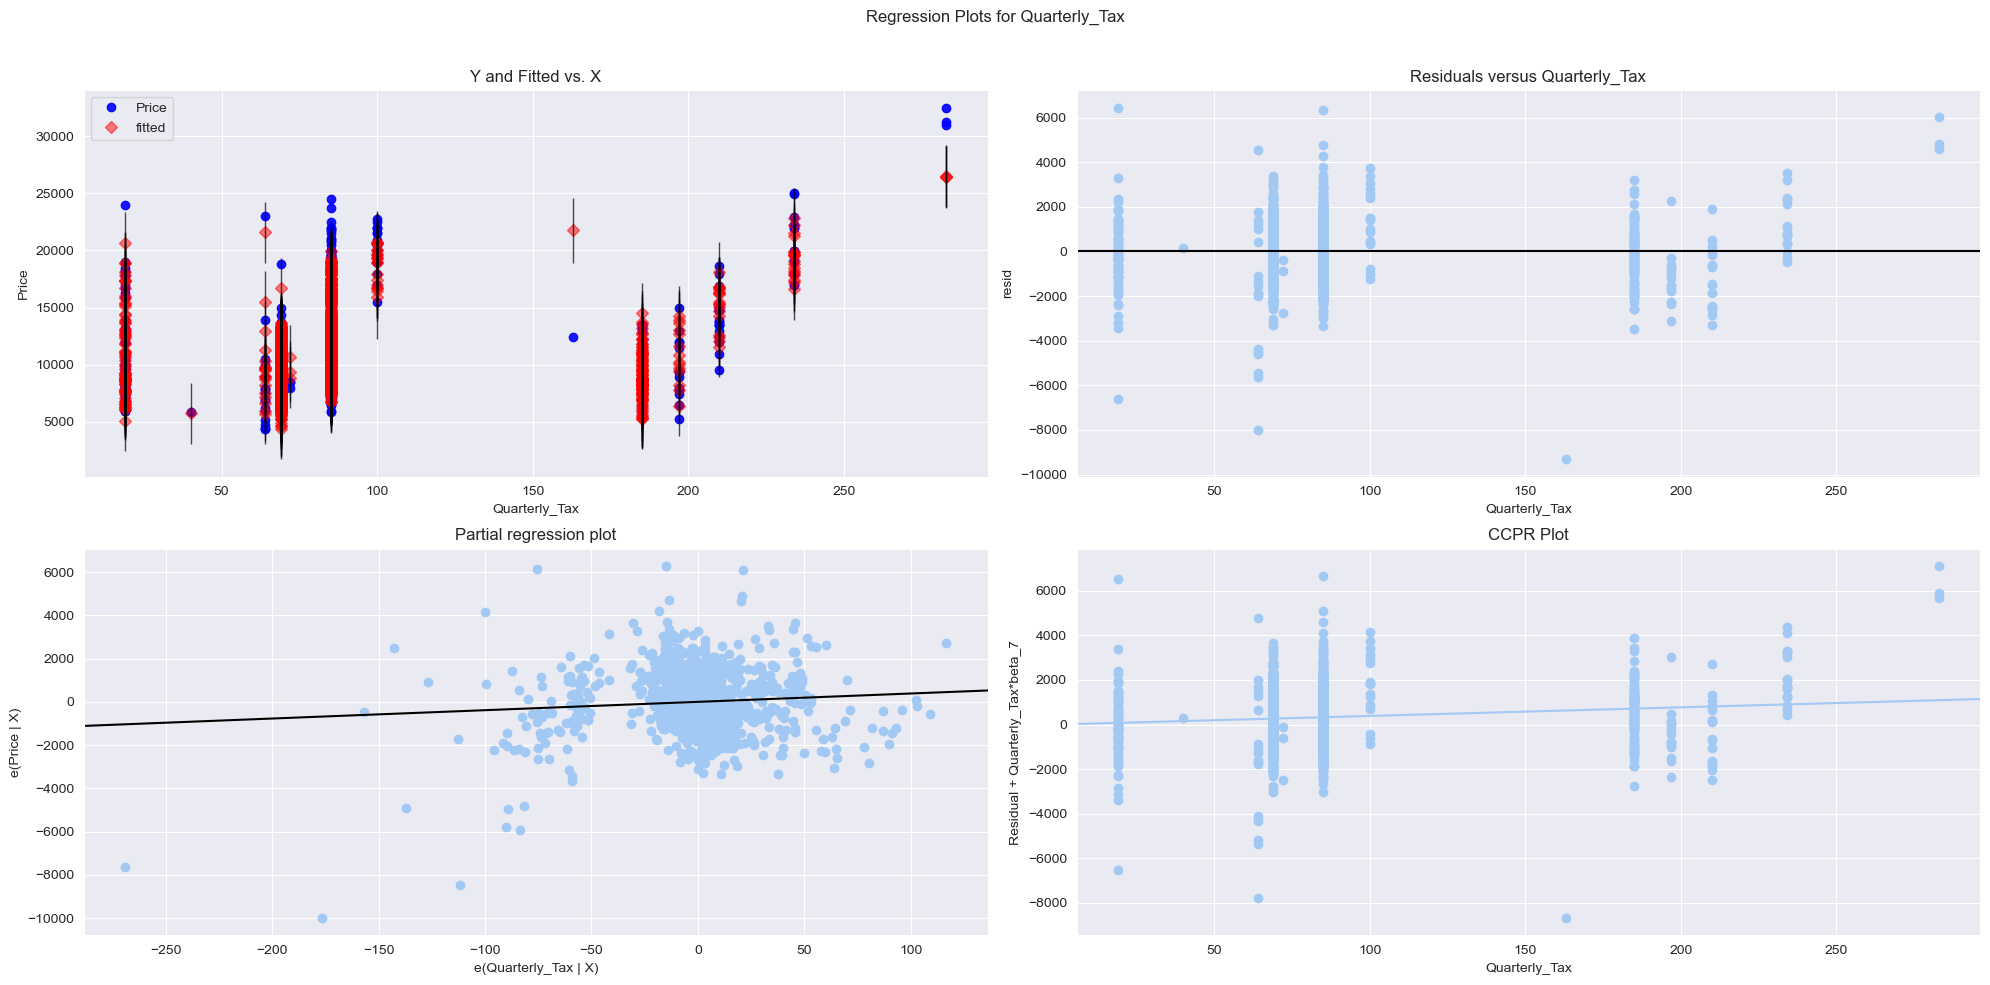

In [74]:
fig=plt.figure(figsize=(20,10))
fig=sm.graphics.plot_regress_exog(model,'Quarterly_Tax',fig=fig)
plt.show()

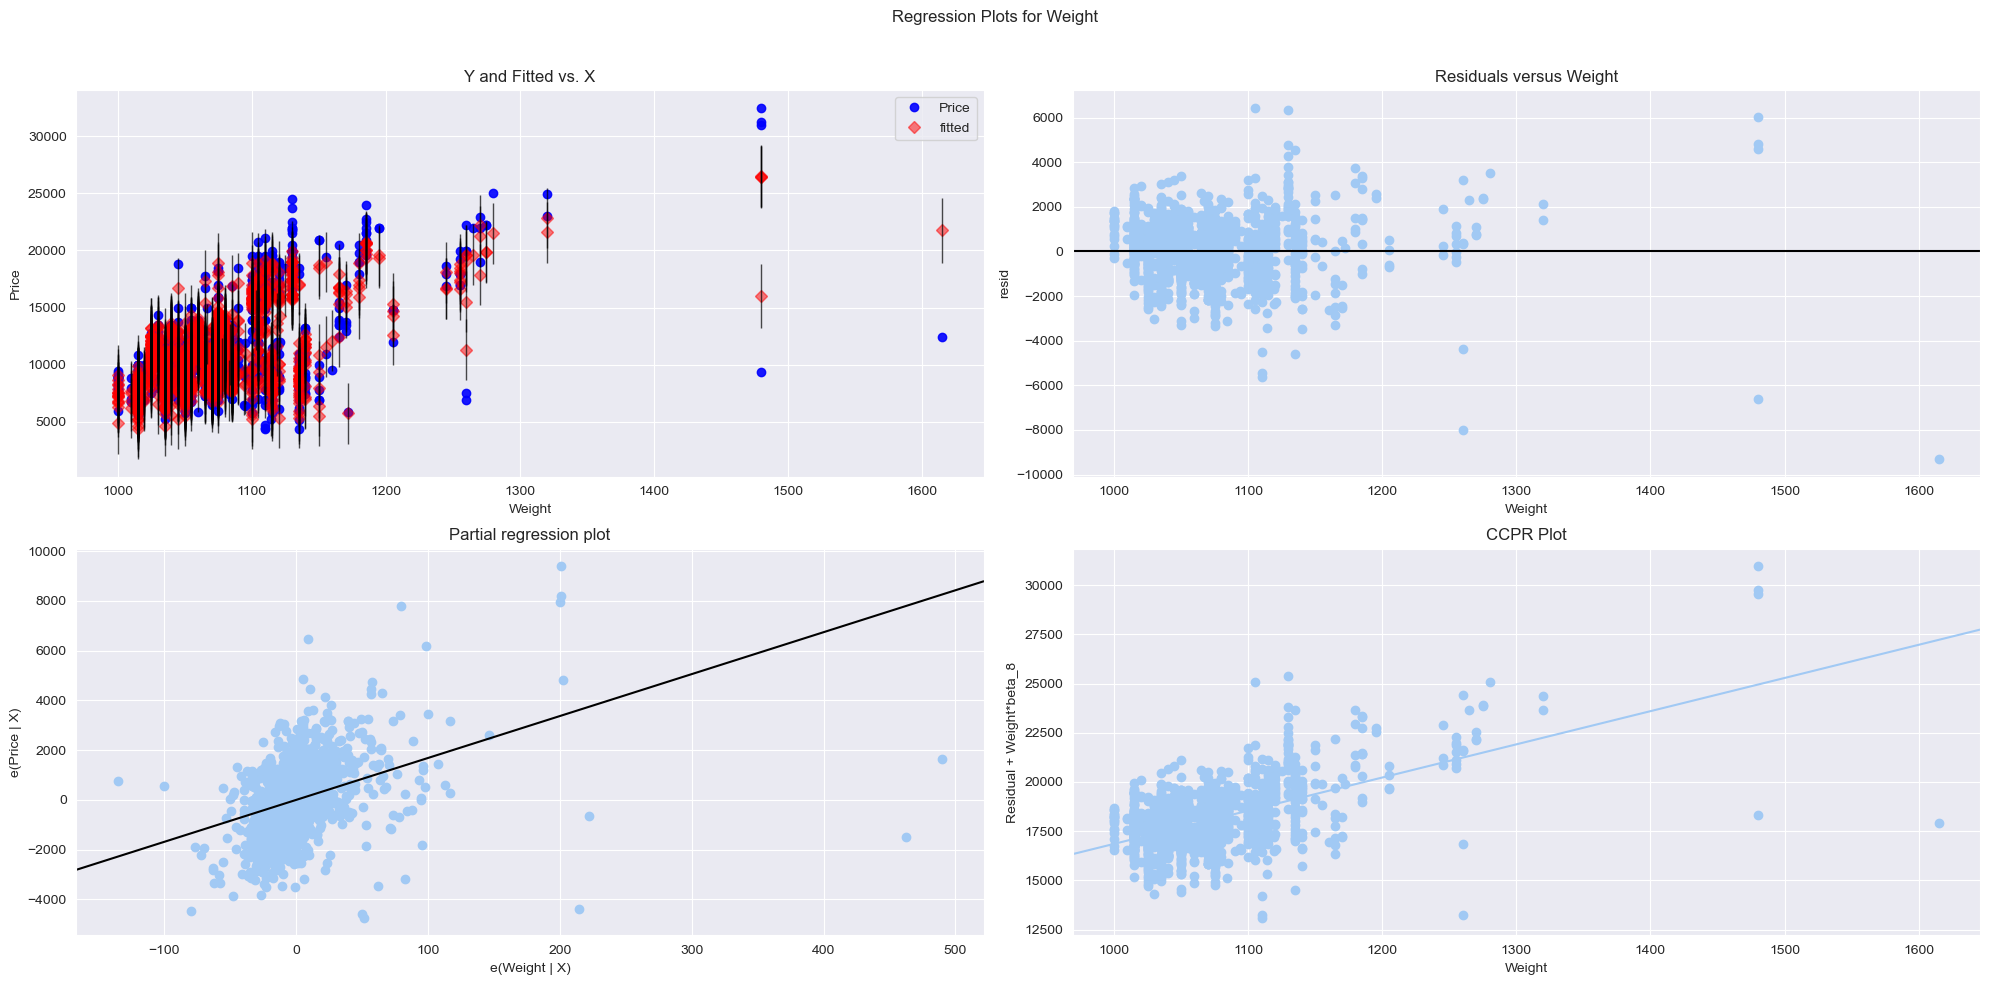

In [75]:
fig=plt.figure(figsize=(20,10))
fig=sm.graphics.plot_regress_exog(model,'Weight',fig=fig)
plt.show()

Model Deletion Diagnostics(Deleting Influencers/Outliers)

Cook's Distance

In [76]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

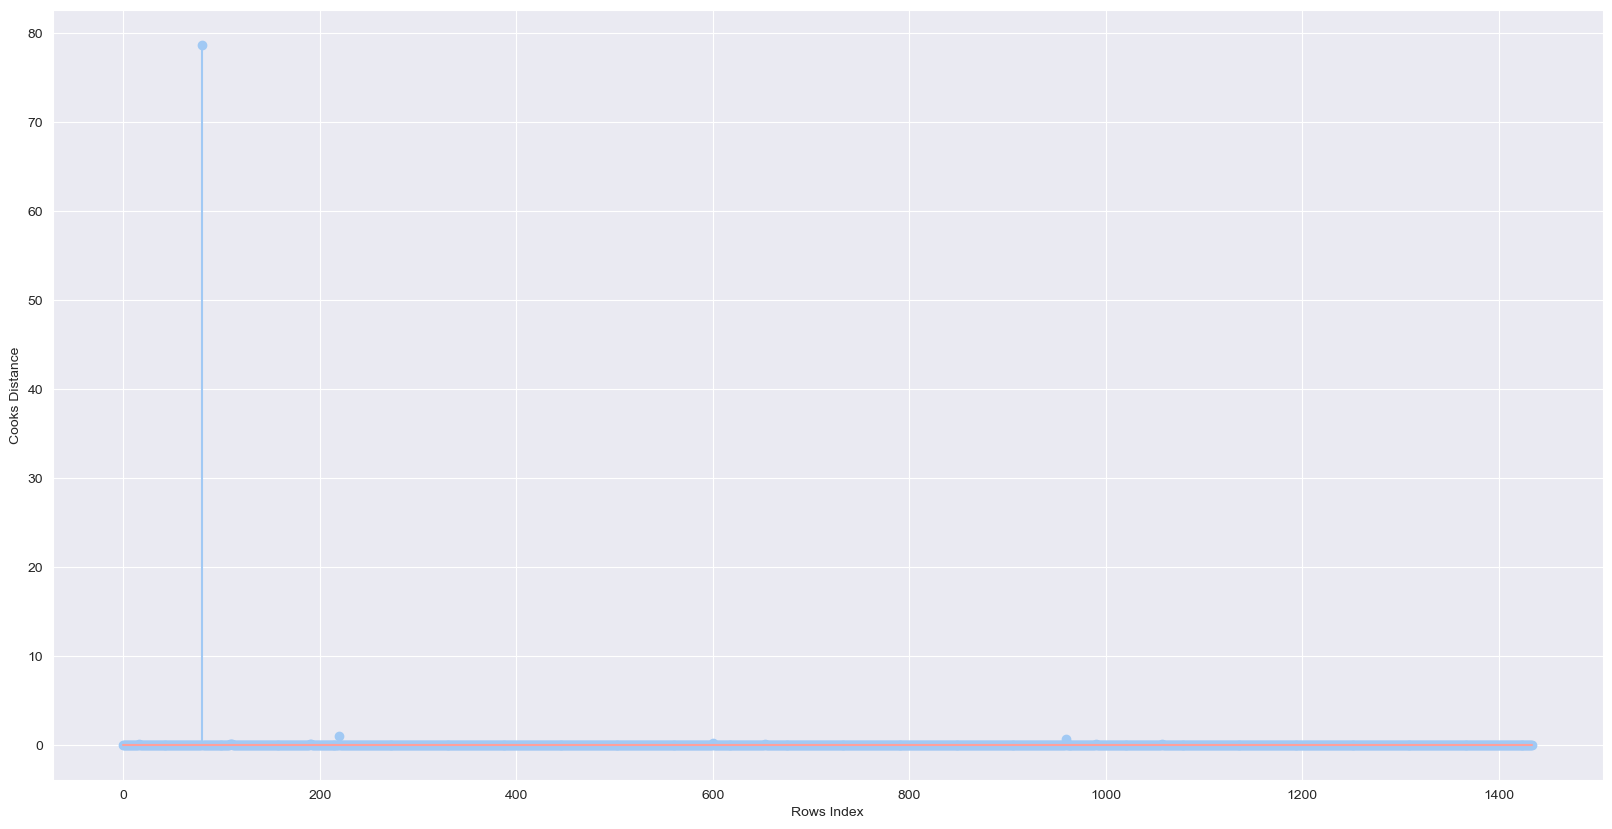

In [78]:
#Stem plot
fig=plt.subplots(figsize=(20,10))
plt.stem(np.arange(len(corolla)),np.round(c,3))
plt.xlabel('Rows Index')
plt.ylabel('Cooks Distance')
plt.show()

In [82]:
#index and value of influencer where c is more than 0.02
(np.argmax(c),np.max(c))

(80, 78.72950582246892)

Detecting High Influence points

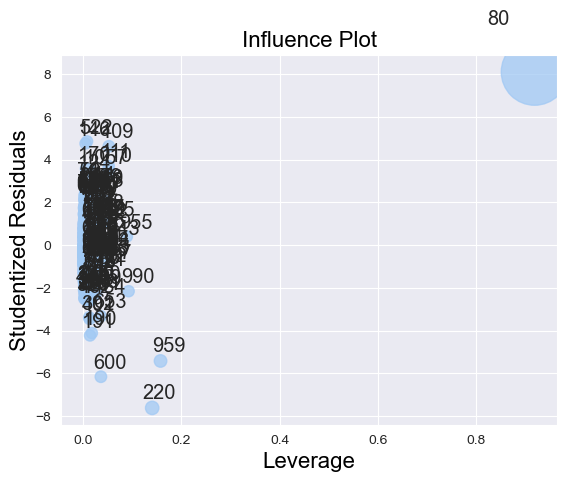

In [85]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model,figsize=(20,20))
plt.show()

In [86]:
corolla.shape

(1435, 9)

In [87]:
k = corolla.shape[1]
n = corolla.shape[0]
leverage_cutoff=3*((k+1)/n)
leverage_cutoff

0.020905923344947737

From the above data it is clear 80 is the influence point

In [90]:
corolla[corolla.index.isin([80])]

Age_08_04     KM   HP     cc  Doors  Gears  Quarterly_Tax  Weight  Price
80         25  20019  110  16000      5      5            100    1180  18950

In [93]:
corolla_new=corolla.copy()
corolla_new

Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight  Price
0            23  46986   90  2000      3      5            210    1165  13500
1            23  72937   90  2000      3      5            210    1165  13750
2            24  41711   90  2000      3      5            210    1165  13950
3            26  48000   90  2000      3      5            210    1165  14950
4            30  38500   90  2000      3      5            210    1170  13750
...         ...    ...  ...   ...    ...    ...            ...     ...    ...
1430         69  20544   86  1300      3      5             69    1025   7500
1431         72  19000   86  1300      3      5             69    1015  10845
1432         71  17016   86  1300      3      5             69    1015   8500
1433         70  16916   86  1300      3      5             69    1015   7250
1434         76      1  110  1600      5      5             19    1114   6950

[1435 rows x 9 columns]

In [102]:
corolla1=corolla_new.drop(corolla_new.index[80],axis=0).reset_index()
corolla1

index  Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight  \
0         0         23  46986   90  2000      3      5            210    1165   
1         1         23  72937   90  2000      3      5            210    1165   
2         2         24  41711   90  2000      3      5            210    1165   
3         3         26  48000   90  2000      3      5            210    1165   
4         4         30  38500   90  2000      3      5            210    1170   
...     ...        ...    ...  ...   ...    ...    ...            ...     ...   
1429   1430         69  20544   86  1300      3      5             69    1025   
1430   1431         72  19000   86  1300      3      5             69    1015   
1431   1432         71  17016   86  1300      3      5             69    1015   
1432   1433         70  16916   86  1300      3      5             69    1015   
1433   1434         76      1  110  1600      5      5             19    1114   

      Price  
0     13500  
1     13750  
2     13950  
3     14950  
4     13750  
...     ...  
1429   7500  
1430  10845  
1431   8500  
1432   7250  
1433   6950  

[1434 rows x 10 columns]

In [103]:
corolla1=corolla1.drop(['index'],axis=1)
corolla1

Age_08_04     KM   HP    cc  Doors  Gears  Quarterly_Tax  Weight  Price
0            23  46986   90  2000      3      5            210    1165  13500
1            23  72937   90  2000      3      5            210    1165  13750
2            24  41711   90  2000      3      5            210    1165  13950
3            26  48000   90  2000      3      5            210    1165  14950
4            30  38500   90  2000      3      5            210    1170  13750
...         ...    ...  ...   ...    ...    ...            ...     ...    ...
1429         69  20544   86  1300      3      5             69    1025   7500
1430         72  19000   86  1300      3      5             69    1015  10845
1431         71  17016   86  1300      3      5             69    1015   8500
1432         70  16916   86  1300      3      5             69    1015   7250
1433         76      1  110  1600      5      5             19    1114   6950

[1434 rows x 9 columns]

In [104]:
final_corolla= smf.ols('Price~Age_08_04+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data = corolla1).fit()
final_corolla.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1172.
Date:                Sun, 03 Sep 2023   Prob (F-statistic):               0.00
Time:                        14:29:18   Log-Likelihood:                -12326.
No. Observations:                1434   AIC:                         2.467e+04
Df Residuals:                    1425   BIC:                         2.472e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6197.9334   1383.989     -4.478      0.000   -8912.808   -3483.059
Age_08_04      -120.5074      2.561    -47.048      0.000    -125.532    -115.483
KM               -0.0178      0.001    -13.931      0.000      -0.020      -0.015
HP               39.2245      2.912     13.470      0.000      33.512      44.937
cc               -2.5088      0.307     -8.162      0.000      -3.112      -1.906
Doors           -26.5129     39.235     -0.676      0.499    -103.478      50.452
Gears           527.1292    192.832      2.734      0.006     148.864     905.395
Quarterly_Tax     8.9414      1.427      6.268      0.000       6.143      11.740
Weight           20.0627      1.118     17.944      0.000      17.869      22.256
==============================================================================
Omnibus:                      242.181   Durbin-Watson:                   1.595
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2635.168
Skew:                          -0.427   Prob(JB):                         0.00
Kurtosis:                       9.586   Cond. No.                     3.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In SK Learn

In [106]:
from sklearn.model_selection import train_test_split

In [112]:
X=corolla1.iloc[:,0:8]
y=corolla1.iloc[:,8]

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1429     7500
1430    10845
1431     8500
1432     7250
1433     6950
Name: Price, Length: 1434, dtype: int64

In [115]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1147, 8), (287, 8), (1147,), (287,))

Multi Linear Regreesion model

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
model1=LinearRegression()

In [118]:
##Train the model

In [119]:
model1.fit(X_train,y_train)

LinearRegression()

In [120]:
train_pred=model1.predict(X_train)
train_pred

array([10497.80605955, 10952.9863274 ,  6471.03869588, ...,
        7555.56431398,  9918.94570372,  7445.14056163])

In [121]:
test_pred=model1.predict(X_test)
test_pred

array([13520.72509208, 11470.91420352, 10622.01791947, 11771.98143149,
       10932.46217981, 13202.03154547, 12677.04343029, 14945.17310382,
       10103.55050953,  8859.42292195,  9367.68336062,  6744.99107889,
        7840.91695073, 17587.85313639, 10384.19457595, 11008.61173025,
        7140.89306722, 11320.98560796,  8091.78625835,  7898.39082763,
       14099.92169304, 14866.66670473,  8519.00556919, 12817.1748361 ,
        8656.84956645, 15718.91368818,  7380.2039382 ,  9295.731042  ,
        9528.47729139, 10577.85209762, 12889.8682449 , 15890.38589053,
        7669.30880894,  8595.65988709,  8343.96806662, 11149.48054418,
       12647.72636334, 13356.96898798, 10044.62078294, 18309.39195468,
        7337.99317032,  8507.34114655,  7718.9216277 ,  9334.32333687,
        5878.04715508,  9963.84498577,  9040.0099588 ,  9878.45392081,
        7950.27263381, 10665.88133601, 11006.69910479, 16119.76021346,
        8530.52071436,  9168.59620267, 11391.00098869, 16418.76200004,
      

Find the metrics for Regression

In [122]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [123]:
train_mse=mean_squared_error(y_train,train_pred)
train_mse

1758921.2299858504

In [124]:
test_mse=mean_squared_error(y_test,test_pred)
test_mse

1535189.4803682566

In [125]:
train_rmse=np.sqrt(train_mse)
test_rmse=np.sqrt(test_mse)
(train_rmse,test_rmse)

(1326.243277074704, 1239.0276350300894)

Predicting for new Data

In [129]:
new_data=pd.DataFrame({'Age_08_04':25,'KM':45000,'HP':91,'cc':2500,'Doors':3,'Gears':4,'Quarterly_Tax':250,'Weight':1150},index=[1])
new_data

Age_08_04     KM  HP    cc  Doors  Gears  Quarterly_Tax  Weight
1         25  45000  91  2500      3      4            250    1150

In [130]:
final_corolla.predict(new_data)

1    14622.315413
dtype: float64

In [131]:
model1.predict(new_data)

array([14763.58586508])

# ---------------------------------------------------------------------------------------------------------------

# 2.Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.


1.Read the data

In [13]:
company=pd.read_csv('50_Startups.csv')
company

R&D Spend  Administration  Marketing Spend       State     Profit
0   165349.20       136897.80        471784.10    New York  192261.83
1   162597.70       151377.59        443898.53  California  191792.06
2   153441.51       101145.55        407934.54     Florida  191050.39
3   144372.41       118671.85        383199.62    New York  182901.99
4   142107.34        91391.77        366168.42     Florida  166187.94
5   131876.90        99814.71        362861.36    New York  156991.12
6   134615.46       147198.87        127716.82  California  156122.51
7   130298.13       145530.06        323876.68     Florida  155752.60
8   120542.52       148718.95        311613.29    New York  152211.77
9   123334.88       108679.17        304981.62  California  149759.96
10  101913.08       110594.11        229160.95     Florida  146121.95
11  100671.96        91790.61        249744.55  California  144259.40
12   93863.75       127320.38        249839.44     Florida  141585.52
13   91992.39       135495.07        252664.93  California  134307.35
14  119943.24       156547.42        256512.92     Florida  132602.65
15  114523.61       122616.84        261776.23    New York  129917.04
16   78013.11       121597.55        264346.06  California  126992.93
17   94657.16       145077.58        282574.31    New York  125370.37
18   91749.16       114175.79        294919.57     Florida  124266.90
19   86419.70       153514.11             0.00    New York  122776.86
20   76253.86       113867.30        298664.47  California  118474.03
21   78389.47       153773.43        299737.29    New York  111313.02
22   73994.56       122782.75        303319.26     Florida  110352.25
23   67532.53       105751.03        304768.73     Florida  108733.99
24   77044.01        99281.34        140574.81    New York  108552.04
25   64664.71       139553.16        137962.62  California  107404.34
26   75328.87       144135.98        134050.07     Florida  105733.54
27   72107.60       127864.55        353183.81    New York  105008.31
28   66051.52       182645.56        118148.20     Florida  103282.38
29   65605.48       153032.06        107138.38    New York  101004.64
30   61994.48       115641.28         91131.24     Florida   99937.59
31   61136.38       152701.92         88218.23    New York   97483.56
32   63408.86       129219.61         46085.25  California   97427.84
33   55493.95       103057.49        214634.81     Florida   96778.92
34   46426.07       157693.92        210797.67  California   96712.80
35   46014.02        85047.44        205517.64    New York   96479.51
36   28663.76       127056.21        201126.82     Florida   90708.19
37   44069.95        51283.14        197029.42  California   89949.14
38   20229.59        65947.93        185265.10    New York   81229.06
39   38558.51        82982.09        174999.30  California   81005.76
40   28754.33       118546.05        172795.67  California   78239.91
41   27892.92        84710.77        164470.71     Florida   77798.83
42   23640.93        96189.63        148001.11  California   71498.49
43   15505.73       127382.30         35534.17    New York   69758.98
44   22177.74       154806.14         28334.72  California   65200.33
45    1000.23       124153.04          1903.93    New York   64926.08
46    1315.46       115816.21        297114.46     Florida   49490.75
47       0.00       135426.92             0.00  California   42559.73
48     542.05        51743.15             0.00    New York   35673.41
49       0.00       116983.80         45173.06  California   14681.40

2.Performing EDA analysis

In [135]:
company.describe()

R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

In [137]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [138]:
from sklearn.preprocessing import LabelEncoder

In [141]:
le=LabelEncoder()
state=le.fit_transform(company['State'])
state

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0])

In [143]:
company['State']=state
company

R&D Spend  Administration  Marketing Spend  State     Profit
0   165349.20       136897.80        471784.10      2  192261.83
1   162597.70       151377.59        443898.53      0  191792.06
2   153441.51       101145.55        407934.54      1  191050.39
3   144372.41       118671.85        383199.62      2  182901.99
4   142107.34        91391.77        366168.42      1  166187.94
5   131876.90        99814.71        362861.36      2  156991.12
6   134615.46       147198.87        127716.82      0  156122.51
7   130298.13       145530.06        323876.68      1  155752.60
8   120542.52       148718.95        311613.29      2  152211.77
9   123334.88       108679.17        304981.62      0  149759.96
10  101913.08       110594.11        229160.95      1  146121.95
11  100671.96        91790.61        249744.55      0  144259.40
12   93863.75       127320.38        249839.44      1  141585.52
13   91992.39       135495.07        252664.93      0  134307.35
14  119943.24       156547.42        256512.92      1  132602.65
15  114523.61       122616.84        261776.23      2  129917.04
16   78013.11       121597.55        264346.06      0  126992.93
17   94657.16       145077.58        282574.31      2  125370.37
18   91749.16       114175.79        294919.57      1  124266.90
19   86419.70       153514.11             0.00      2  122776.86
20   76253.86       113867.30        298664.47      0  118474.03
21   78389.47       153773.43        299737.29      2  111313.02
22   73994.56       122782.75        303319.26      1  110352.25
23   67532.53       105751.03        304768.73      1  108733.99
24   77044.01        99281.34        140574.81      2  108552.04
25   64664.71       139553.16        137962.62      0  107404.34
26   75328.87       144135.98        134050.07      1  105733.54
27   72107.60       127864.55        353183.81      2  105008.31
28   66051.52       182645.56        118148.20      1  103282.38
29   65605.48       153032.06        107138.38      2  101004.64
30   61994.48       115641.28         91131.24      1   99937.59
31   61136.38       152701.92         88218.23      2   97483.56
32   63408.86       129219.61         46085.25      0   97427.84
33   55493.95       103057.49        214634.81      1   96778.92
34   46426.07       157693.92        210797.67      0   96712.80
35   46014.02        85047.44        205517.64      2   96479.51
36   28663.76       127056.21        201126.82      1   90708.19
37   44069.95        51283.14        197029.42      0   89949.14
38   20229.59        65947.93        185265.10      2   81229.06
39   38558.51        82982.09        174999.30      0   81005.76
40   28754.33       118546.05        172795.67      0   78239.91
41   27892.92        84710.77        164470.71      1   77798.83
42   23640.93        96189.63        148001.11      0   71498.49
43   15505.73       127382.30         35534.17      2   69758.98
44   22177.74       154806.14         28334.72      0   65200.33
45    1000.23       124153.04          1903.93      2   64926.08
46    1315.46       115816.21        297114.46      1   49490.75
47       0.00       135426.92             0.00      0   42559.73
48     542.05        51743.15             0.00      2   35673.41
49       0.00       116983.80         45173.06      0   14681.40

In [144]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     int32  
 4   Profit           50 non-null     float64
dtypes: float64(4), int32(1)
memory usage: 1.9 KB


In [146]:
company.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
dtype: bool

In [149]:
company.rename(columns={'R&D Spend':'RandD','Marketing Spend':'Marketing'},inplace=True)
company.head()

RandD  Administration  Marketing  State     Profit
0  165349.20       136897.80  471784.10      2  192261.83
1  162597.70       151377.59  443898.53      0  191792.06
2  153441.51       101145.55  407934.54      1  191050.39
3  144372.41       118671.85  383199.62      2  182901.99
4  142107.34        91391.77  366168.42      1  166187.94

In [151]:
company.isnull()

RandD  Administration  Marketing  State  Profit
0   False           False      False  False   False
1   False           False      False  False   False
2   False           False      False  False   False
3   False           False      False  False   False
4   False           False      False  False   False
5   False           False      False  False   False
6   False           False      False  False   False
7   False           False      False  False   False
8   False           False      False  False   False
9   False           False      False  False   False
10  False           False      False  False   False
11  False           False      False  False   False
12  False           False      False  False   False
13  False           False      False  False   False
14  False           False      False  False   False
15  False           False      False  False   False
16  False           False      False  False   False
17  False           False      False  False   False
18  False           False      False  False   False
19  False           False      False  False   False
20  False           False      False  False   False
21  False           False      False  False   False
22  False           False      False  False   False
23  False           False      False  False   False
24  False           False      False  False   False
25  False           False      False  False   False
26  False           False      False  False   False
27  False           False      False  False   False
28  False           False      False  False   False
29  False           False      False  False   False
30  False           False      False  False   False
31  False           False      False  False   False
32  False           False      False  False   False
33  False           False      False  False   False
34  False           False      False  False   False
35  False           False      False  False   False
36  False           False      False  False   False
37  False           False      False  False   False
38  False           False      False  False   False
39  False           False      False  False   False
40  False           False      False  False   False
41  False           False      False  False   False
42  False           False      False  False   False
43  False           False      False  False   False
44  False           False      False  False   False
45  False           False      False  False   False
46  False           False      False  False   False
47  False           False      False  False   False
48  False           False      False  False   False
49  False           False      False  False   False

<Axes: >

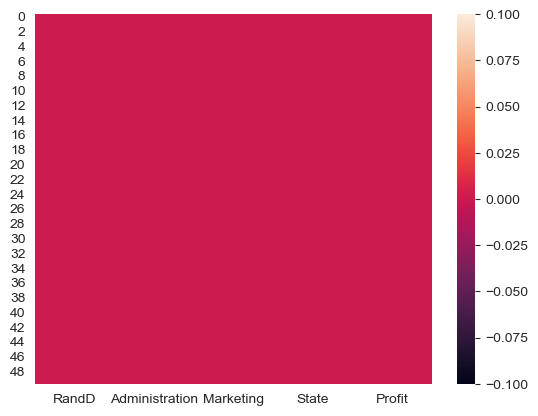

In [152]:
sns.heatmap(company.isnull())

Finding Corelation

In [153]:
company.corr()

RandD  Administration  Marketing     State    Profit
RandD           1.000000        0.241955   0.724248  0.104685  0.972900
Administration  0.241955        1.000000  -0.032154  0.011847  0.200717
Marketing       0.724248       -0.032154   1.000000  0.077670  0.747766
State           0.104685        0.011847   0.077670  1.000000  0.101796
Profit          0.972900        0.200717   0.747766  0.101796  1.000000

<Axes: >

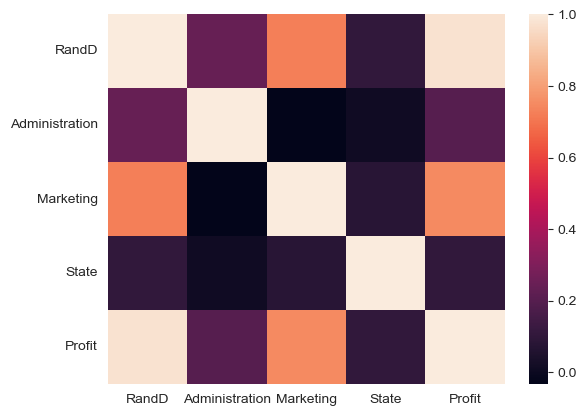

In [154]:
sns.heatmap(company.corr())

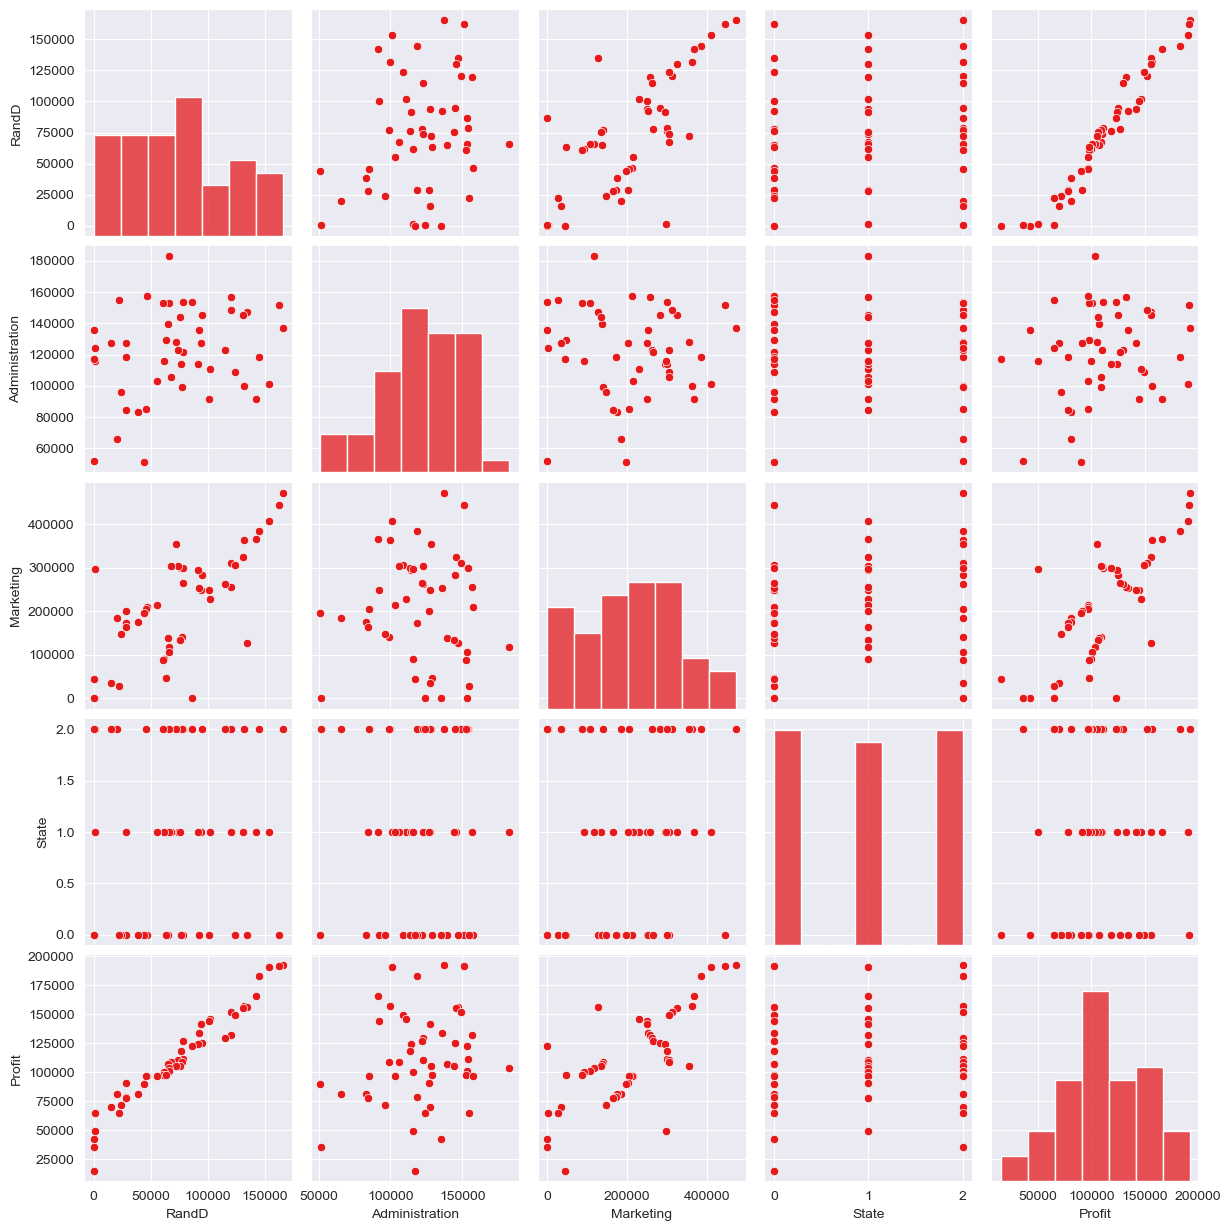

In [162]:
 #Format the plot background and scatter plots for all the variables
sns.set_palette('Set1')

sns.set_style(style='darkgrid')
sns.pairplot(company)
plt.show()

Finding Outliers / Influencers

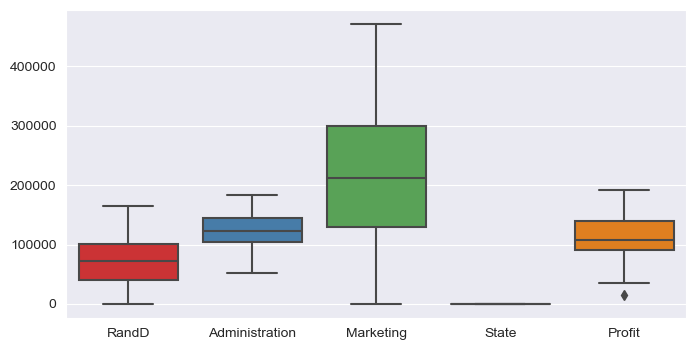

In [165]:
plt.figure(figsize=(8,4))
box = sns.boxplot(data = company)
plt.show()

Preparing a model

In [171]:
#Build model
model = smf.ols('Profit~RandD+Administration+Marketing+State',data=company).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           8.51e-29
Time:                        16:31:00   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RandD              0.8058      0.046     17.609      0.000       0.714       0.898
Administration    -0.0268      0.052     -0.520      0.606      -0.131       0.077
Marketing          0.0272      0.017      1.637      0.109      -0.006       0.061
State            -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [172]:
#Coefficients
model.params

Intercept         50142.506443
RandD                 0.805760
Administration       -0.026826
Marketing             0.027228
State               -22.320577
dtype: float64

In [173]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept          7.368962
RandD             17.608621
Administration    -0.519906
Marketing          1.636966
State             -0.013865
dtype: float64 
 Intercept         2.900008e-09
RandD             8.249206e-22
Administration    6.056771e-01
Marketing         1.086131e-01
State             9.889988e-01
dtype: float64


In [174]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507462044842656, 0.9463680893273114)

Simple Linear Regression Models

In [179]:
m_R=smf.ols('Profit~RandD',data=company).fit()
m_R.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           3.50e-32
Time:                        16:48:12   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RandD          0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [175]:
m_A=smf.ols('Profit~Administration',data=company).fit()
m_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Sun, 03 Sep 2023   Prob (F-statistic):              0.162
Time:                        16:39:30   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
Administration     0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [176]:
m_M=smf.ols('Profit~Marketing',data=company).fit()
m_M.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           4.38e-10
Time:                        16:40:14   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
Marketing      0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [177]:
m_S=smf.ols('Profit~State',data=company).fit()
m_S.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5026
Date:                Sun, 03 Sep 2023   Prob (F-statistic):              0.482
Time:                        16:41:33   Log-Likelihood:                -600.39
No. Observations:                  50   AIC:                             1205.
Df Residuals:                      48   BIC:                             1209.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.071e+05   9005.386     11.891      0.000     8.9e+04    1.25e+05
State       4925.6356   6947.806      0.709      0.482   -9043.865    1.89e+04
==============================================================================
Omnibus:                        0.023   Durbin-Watson:                   0.045
Prob(Omnibus):                  0.989   Jarque-Bera (JB):                0.134
Skew:                           0.047   Prob(JB):                        0.935
Kurtosis:                       2.765   Cond. No.                         2.91
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [178]:
m_AMS = smf.ols('Profit~Administration+Marketing+State',data=company).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     217.2
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           8.51e-29
Time:                        16:45:53   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1061.
Df Residuals:                      45   BIC:                             1070.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.014e+04   6804.555      7.369      0.000    3.64e+04    6.38e+04
RandD              0.8058      0.046     17.609      0.000       0.714       0.898
Administration    -0.0268      0.052     -0.520      0.606      -0.131       0.077
Marketing          0.0272      0.017      1.637      0.109      -0.006       0.061
State            -22.3206   1609.829     -0.014      0.989   -3264.682    3220.041
==============================================================================
Omnibus:                       14.864   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.542
Skew:                          -0.949   Prob(JB):                     2.10e-05
Kurtosis:                       5.596   Cond. No.                     1.44e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [182]:
m_RM= smf.ols('Profit~RandD+Administration+Marketing',data=company).fit()
m_RM.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           4.53e-30
Time:                        17:04:24   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RandD              0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Calculating VIF

In [183]:
rsq_rnd = smf.ols('RandD~Administration+Marketing+State',data=company).fit().rsquared  
vif_rnd = 1/(1-rsq_rnd) 

rsq_admin = smf.ols('Administration~RandD+Marketing+State',data=company).fit().rsquared  
vif_admin = 1/(1-rsq_admin) 

rsq_market = smf.ols('Marketing~Administration+RandD+State',data=company).fit().rsquared  
vif_market = 1/(1-rsq_market) 

rsq_state = smf.ols('State~Marketing+Administration+RandD',data=company).fit().rsquared  
vif_state = 1/(1-rsq_state) 

# Storing vif values in a data frame
d1 = {'Variables':['RandD','Administration','Marketing','State'],'VIF':[vif_rnd,vif_admin,vif_market,vif_state]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

Variables       VIF
0           RandD  2.481178
1  Administration  1.175315
2       Marketing  2.326780
3           State  1.011281

Residual Analysis ; Test for Normality of Residuals (Q-Q Plot)

In [184]:
model.resid

0      -240.934416
1      2609.393955
2      8899.431581
3      9224.499382
4     -5954.860630
5     -6570.087958
6     -2016.402125
7     -4271.004155
8       490.611791
9     -5149.346740
10    10611.576482
11     8661.886997
12    12446.641369
13     6796.378735
14   -16947.693104
15   -16297.587589
16    10055.036102
17    -4800.428034
18    -4748.168968
19     7163.632009
20     1811.887956
21    -5983.963770
22    -4354.693173
23    -1262.466061
24    -4788.999732
25     5144.849591
26    -4866.912270
27    -9377.248176
28     1623.265402
29     -767.388601
30      485.636602
31     -181.152734
32    -1595.336763
33    -1135.453688
34     7652.782939
35     5991.106571
36    15424.078702
37      307.906968
38    11555.779367
39    -2744.396769
40     3403.599361
41     2997.938430
42      857.718955
43     9616.848808
44      569.213149
45    17300.941187
46    -6672.246236
47    -3949.833956
48   -13473.163247
49   -33552.873495
dtype: float64

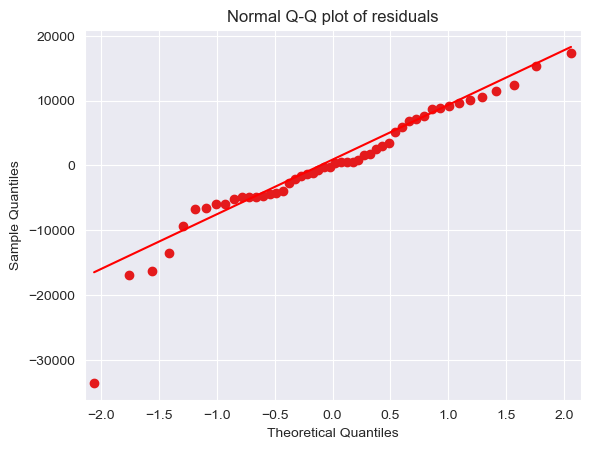

In [185]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [186]:
list(np.where(model.resid<-20000))

[array([49], dtype=int64)]

Residual Plot for Homoscedasticity

In [187]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

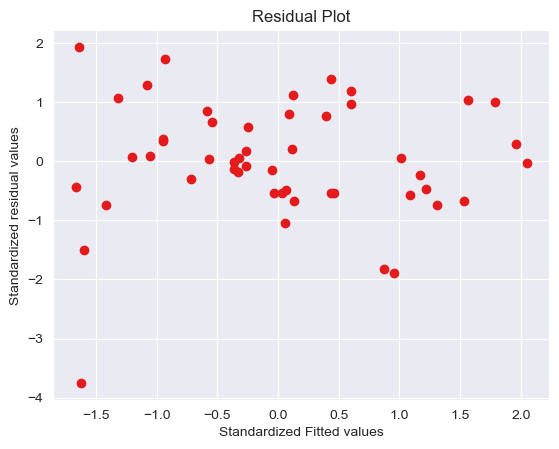

In [188]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

Residual Vs Regressors

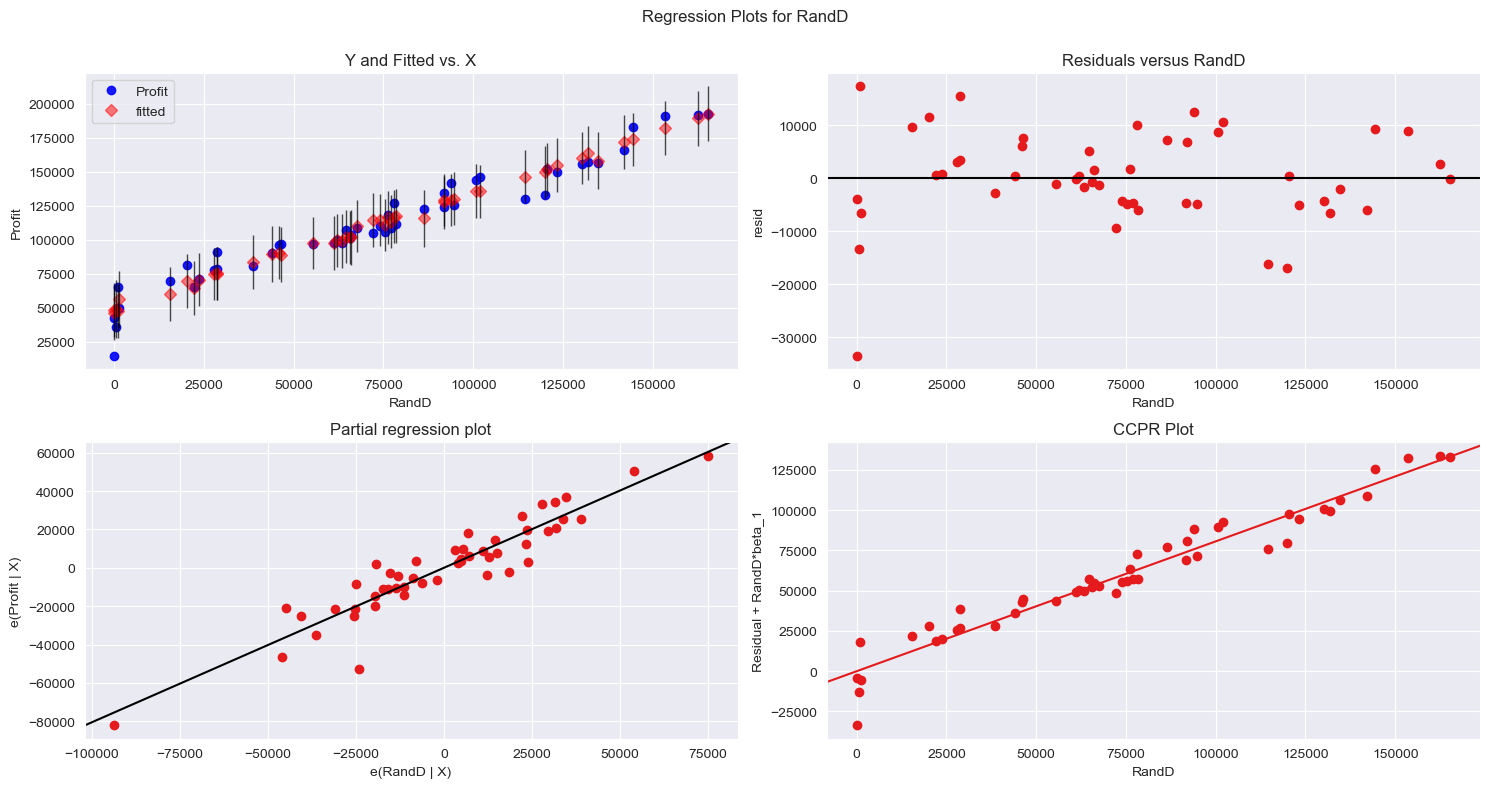

In [189]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RandD", fig=fig)
plt.show()

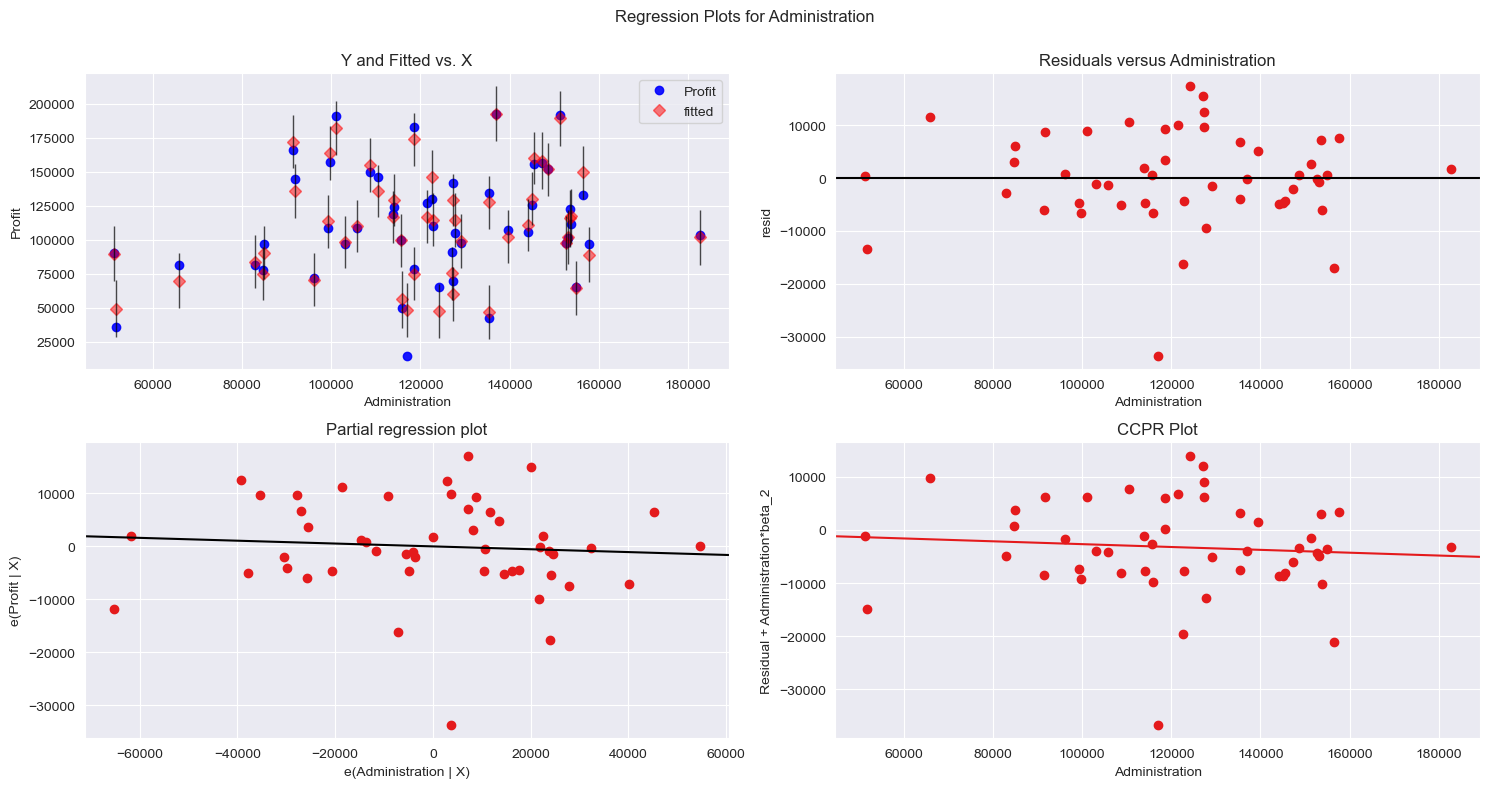

In [190]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

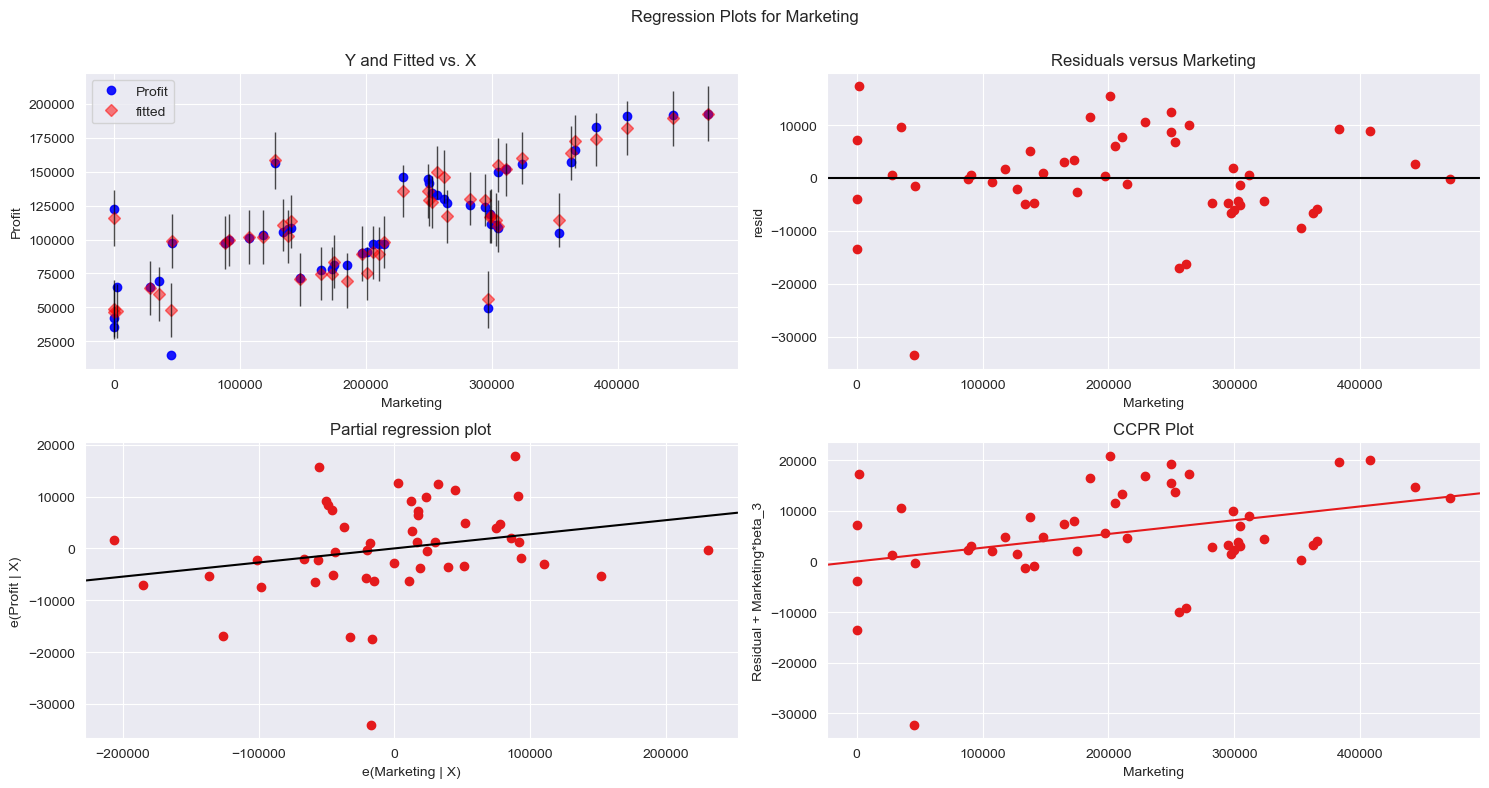

In [191]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing", fig=fig)
plt.show()

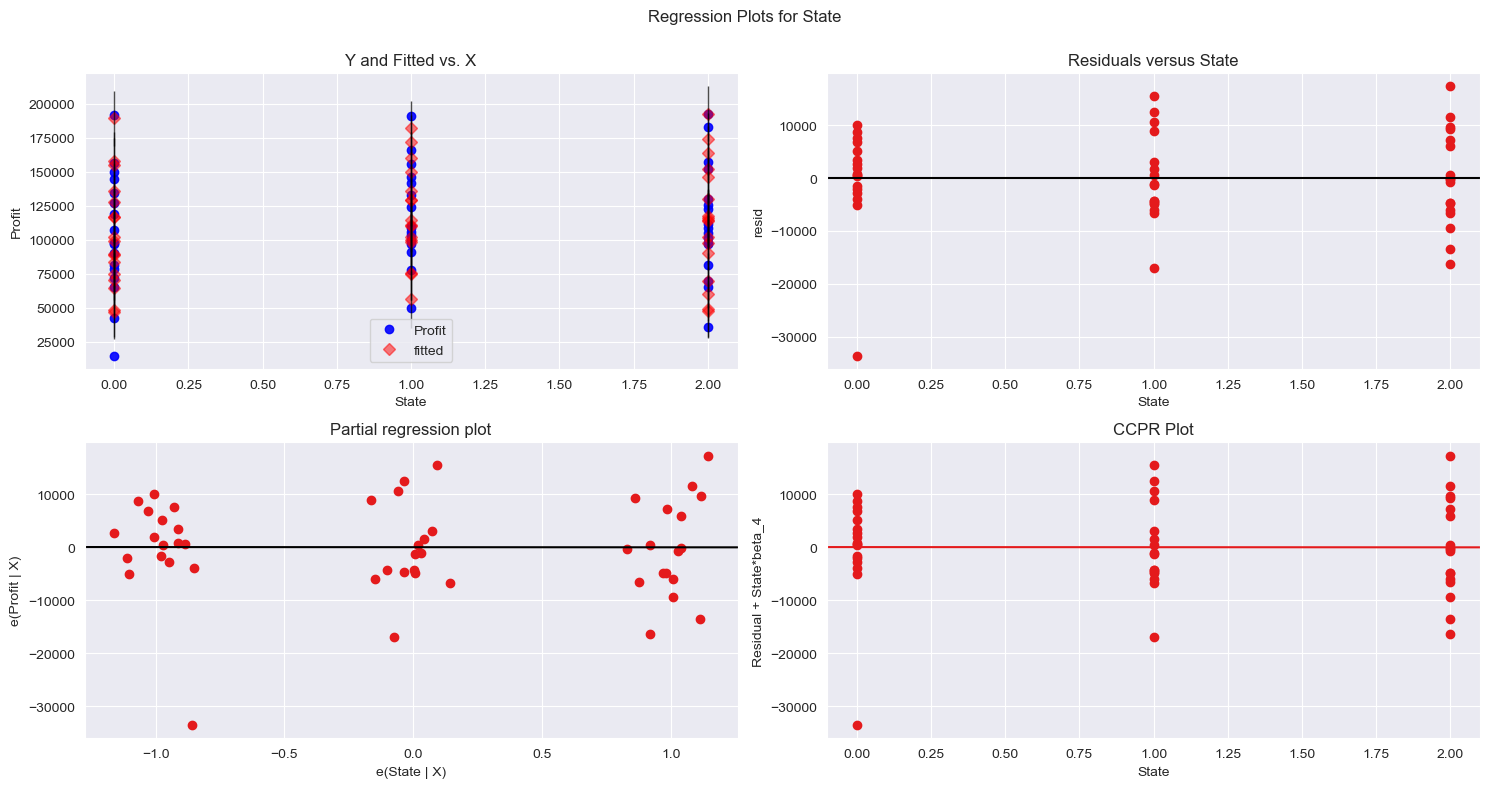

In [192]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "State", fig=fig)
plt.show()

Model Deletion Diagnostics

Detecting Influencers/Outliers : Cook’s Distance

In [194]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

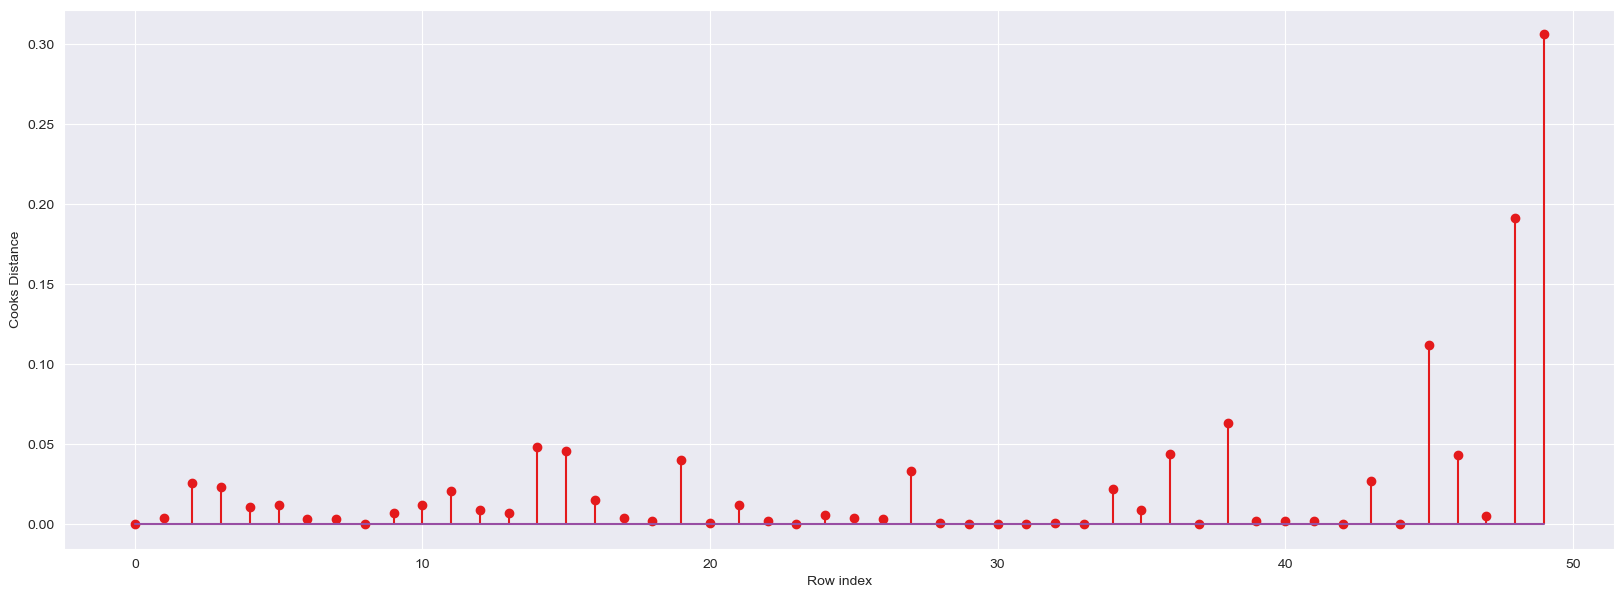

In [195]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(company)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [196]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.3060281954699341)

High Influence points

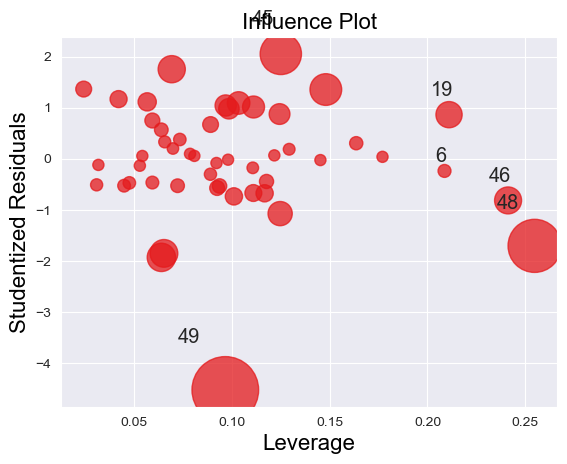

In [217]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [218]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.08147632311977715

From the above plot, it is evident that data point 49 is the influencer¶

In [219]:
company[company.index.isin([49])]

RandD  Administration  Marketing  State   Profit
49    0.0        116983.8   45173.06      0  14681.4

In [228]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startup=company.drop(company.index[[49]],axis=0).reset_index()
startup

index      RandD  Administration  Marketing  State     Profit
0       0  165349.20       136897.80  471784.10      2  192261.83
1       1  162597.70       151377.59  443898.53      0  191792.06
2       2  153441.51       101145.55  407934.54      1  191050.39
3       3  144372.41       118671.85  383199.62      2  182901.99
4       4  142107.34        91391.77  366168.42      1  166187.94
5       5  131876.90        99814.71  362861.36      2  156991.12
6       6  134615.46       147198.87  127716.82      0  156122.51
7       7  130298.13       145530.06  323876.68      1  155752.60
8       8  120542.52       148718.95  311613.29      2  152211.77
9       9  123334.88       108679.17  304981.62      0  149759.96
10     10  101913.08       110594.11  229160.95      1  146121.95
11     11  100671.96        91790.61  249744.55      0  144259.40
12     12   93863.75       127320.38  249839.44      1  141585.52
13     13   91992.39       135495.07  252664.93      0  134307.35
14     14  119943.24       156547.42  256512.92      1  132602.65
15     15  114523.61       122616.84  261776.23      2  129917.04
16     16   78013.11       121597.55  264346.06      0  126992.93
17     17   94657.16       145077.58  282574.31      2  125370.37
18     18   91749.16       114175.79  294919.57      1  124266.90
19     19   86419.70       153514.11       0.00      2  122776.86
20     20   76253.86       113867.30  298664.47      0  118474.03
21     21   78389.47       153773.43  299737.29      2  111313.02
22     22   73994.56       122782.75  303319.26      1  110352.25
23     23   67532.53       105751.03  304768.73      1  108733.99
24     24   77044.01        99281.34  140574.81      2  108552.04
25     25   64664.71       139553.16  137962.62      0  107404.34
26     26   75328.87       144135.98  134050.07      1  105733.54
27     27   72107.60       127864.55  353183.81      2  105008.31
28     28   66051.52       182645.56  118148.20      1  103282.38
29     29   65605.48       153032.06  107138.38      2  101004.64
30     30   61994.48       115641.28   91131.24      1   99937.59
31     31   61136.38       152701.92   88218.23      2   97483.56
32     32   63408.86       129219.61   46085.25      0   97427.84
33     33   55493.95       103057.49  214634.81      1   96778.92
34     34   46426.07       157693.92  210797.67      0   96712.80
35     35   46014.02        85047.44  205517.64      2   96479.51
36     36   28663.76       127056.21  201126.82      1   90708.19
37     37   44069.95        51283.14  197029.42      0   89949.14
38     38   20229.59        65947.93  185265.10      2   81229.06
39     39   38558.51        82982.09  174999.30      0   81005.76
40     40   28754.33       118546.05  172795.67      0   78239.91
41     41   27892.92        84710.77  164470.71      1   77798.83
42     42   23640.93        96189.63  148001.11      0   71498.49
43     43   15505.73       127382.30   35534.17      2   69758.98
44     44   22177.74       154806.14   28334.72      0   65200.33
45     45    1000.23       124153.04    1903.93      2   64926.08
46     46    1315.46       115816.21  297114.46      1   49490.75
47     47       0.00       135426.92       0.00      0   42559.73
48     48     542.05        51743.15       0.00      2   35673.41

In [229]:
#Drop the original index
startup=startup.drop(['index'],axis=1)
startup

RandD  Administration  Marketing  State     Profit
0   165349.20       136897.80  471784.10      2  192261.83
1   162597.70       151377.59  443898.53      0  191792.06
2   153441.51       101145.55  407934.54      1  191050.39
3   144372.41       118671.85  383199.62      2  182901.99
4   142107.34        91391.77  366168.42      1  166187.94
5   131876.90        99814.71  362861.36      2  156991.12
6   134615.46       147198.87  127716.82      0  156122.51
7   130298.13       145530.06  323876.68      1  155752.60
8   120542.52       148718.95  311613.29      2  152211.77
9   123334.88       108679.17  304981.62      0  149759.96
10  101913.08       110594.11  229160.95      1  146121.95
11  100671.96        91790.61  249744.55      0  144259.40
12   93863.75       127320.38  249839.44      1  141585.52
13   91992.39       135495.07  252664.93      0  134307.35
14  119943.24       156547.42  256512.92      1  132602.65
15  114523.61       122616.84  261776.23      2  129917.04
16   78013.11       121597.55  264346.06      0  126992.93
17   94657.16       145077.58  282574.31      2  125370.37
18   91749.16       114175.79  294919.57      1  124266.90
19   86419.70       153514.11       0.00      2  122776.86
20   76253.86       113867.30  298664.47      0  118474.03
21   78389.47       153773.43  299737.29      2  111313.02
22   73994.56       122782.75  303319.26      1  110352.25
23   67532.53       105751.03  304768.73      1  108733.99
24   77044.01        99281.34  140574.81      2  108552.04
25   64664.71       139553.16  137962.62      0  107404.34
26   75328.87       144135.98  134050.07      1  105733.54
27   72107.60       127864.55  353183.81      2  105008.31
28   66051.52       182645.56  118148.20      1  103282.38
29   65605.48       153032.06  107138.38      2  101004.64
30   61994.48       115641.28   91131.24      1   99937.59
31   61136.38       152701.92   88218.23      2   97483.56
32   63408.86       129219.61   46085.25      0   97427.84
33   55493.95       103057.49  214634.81      1   96778.92
34   46426.07       157693.92  210797.67      0   96712.80
35   46014.02        85047.44  205517.64      2   96479.51
36   28663.76       127056.21  201126.82      1   90708.19
37   44069.95        51283.14  197029.42      0   89949.14
38   20229.59        65947.93  185265.10      2   81229.06
39   38558.51        82982.09  174999.30      0   81005.76
40   28754.33       118546.05  172795.67      0   78239.91
41   27892.92        84710.77  164470.71      1   77798.83
42   23640.93        96189.63  148001.11      0   71498.49
43   15505.73       127382.30   35534.17      2   69758.98
44   22177.74       154806.14   28334.72      0   65200.33
45    1000.23       124153.04    1903.93      2   64926.08
46    1315.46       115816.21  297114.46      1   49490.75
47       0.00       135426.92       0.00      0   42559.73
48     542.05        51743.15       0.00      2   35673.41

Build Model

In [231]:
#Exclude variable "State" and generate R-Squared and AIC values
final_ml_F= smf.ols('Profit~Administration+Marketing+RandD+State',data = startup).fit()
final_ml_F.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     276.6
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           1.45e-30
Time:                        17:58:37   Log-Likelihood:                -506.00
No. Observations:                  49   AIC:                             1022.
Df Residuals:                      44   BIC:                             1031.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.332e+04   5726.740      9.311      0.000    4.18e+04    6.49e+04
Administration    -0.0225      0.043     -0.522      0.604      -0.109       0.064
Marketing          0.0252      0.014      1.811      0.077      -0.003       0.053
RandD              0.7844      0.039     20.367      0.000       0.707       0.862
State           -969.6140   1360.800     -0.713      0.480   -3712.127    1772.899
==============================================================================
Omnibus:                        0.042   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.979   Jarque-Bera (JB):                0.215
Skew:                           0.042   Prob(JB):                        0.898
Kurtosis:                       2.686   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [235]:
#Again check for influencers
model_influence_F = final_ml_F.get_influence()
(c_F, _) = model_influence_F.cooks_distance

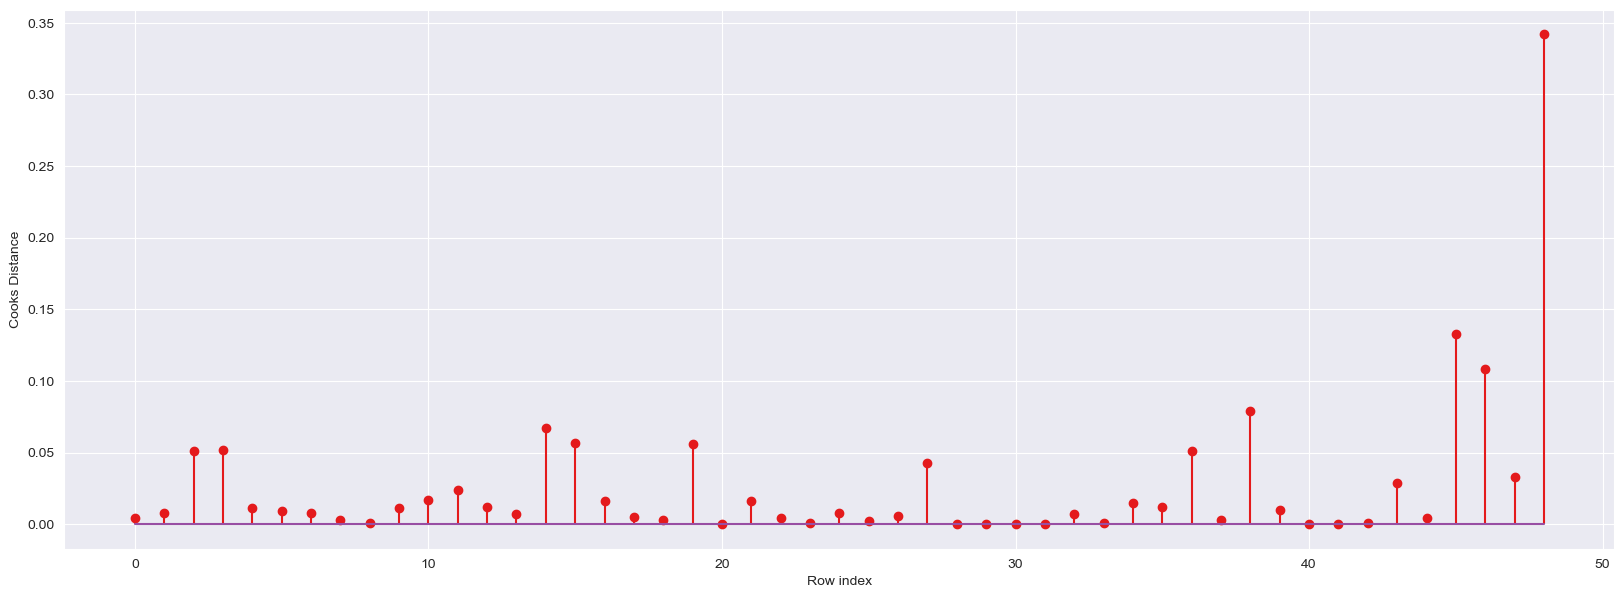

In [236]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(c_F,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [246]:
#index and value of influencer where c is more than .3
(np.argmax(c_F),np.max(c_F))

(48, 0.34222735319802083)

High Influence points

In [247]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.08147632311977715

From the above plot, it is evident that data point 49 is the influencer

In [249]:
startup[startup.index.isin([48])]

RandD  Administration  Marketing  State    Profit
48  542.05        51743.15        0.0      2  35673.41

In [250]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startup1=startup.drop(startup.index[[48]],axis=0).reset_index()
startup1

index      RandD  Administration  Marketing  State     Profit
0       0  165349.20       136897.80  471784.10      2  192261.83
1       1  162597.70       151377.59  443898.53      0  191792.06
2       2  153441.51       101145.55  407934.54      1  191050.39
3       3  144372.41       118671.85  383199.62      2  182901.99
4       4  142107.34        91391.77  366168.42      1  166187.94
5       5  131876.90        99814.71  362861.36      2  156991.12
6       6  134615.46       147198.87  127716.82      0  156122.51
7       7  130298.13       145530.06  323876.68      1  155752.60
8       8  120542.52       148718.95  311613.29      2  152211.77
9       9  123334.88       108679.17  304981.62      0  149759.96
10     10  101913.08       110594.11  229160.95      1  146121.95
11     11  100671.96        91790.61  249744.55      0  144259.40
12     12   93863.75       127320.38  249839.44      1  141585.52
13     13   91992.39       135495.07  252664.93      0  134307.35
14     14  119943.24       156547.42  256512.92      1  132602.65
15     15  114523.61       122616.84  261776.23      2  129917.04
16     16   78013.11       121597.55  264346.06      0  126992.93
17     17   94657.16       145077.58  282574.31      2  125370.37
18     18   91749.16       114175.79  294919.57      1  124266.90
19     19   86419.70       153514.11       0.00      2  122776.86
20     20   76253.86       113867.30  298664.47      0  118474.03
21     21   78389.47       153773.43  299737.29      2  111313.02
22     22   73994.56       122782.75  303319.26      1  110352.25
23     23   67532.53       105751.03  304768.73      1  108733.99
24     24   77044.01        99281.34  140574.81      2  108552.04
25     25   64664.71       139553.16  137962.62      0  107404.34
26     26   75328.87       144135.98  134050.07      1  105733.54
27     27   72107.60       127864.55  353183.81      2  105008.31
28     28   66051.52       182645.56  118148.20      1  103282.38
29     29   65605.48       153032.06  107138.38      2  101004.64
30     30   61994.48       115641.28   91131.24      1   99937.59
31     31   61136.38       152701.92   88218.23      2   97483.56
32     32   63408.86       129219.61   46085.25      0   97427.84
33     33   55493.95       103057.49  214634.81      1   96778.92
34     34   46426.07       157693.92  210797.67      0   96712.80
35     35   46014.02        85047.44  205517.64      2   96479.51
36     36   28663.76       127056.21  201126.82      1   90708.19
37     37   44069.95        51283.14  197029.42      0   89949.14
38     38   20229.59        65947.93  185265.10      2   81229.06
39     39   38558.51        82982.09  174999.30      0   81005.76
40     40   28754.33       118546.05  172795.67      0   78239.91
41     41   27892.92        84710.77  164470.71      1   77798.83
42     42   23640.93        96189.63  148001.11      0   71498.49
43     43   15505.73       127382.30   35534.17      2   69758.98
44     44   22177.74       154806.14   28334.72      0   65200.33
45     45    1000.23       124153.04    1903.93      2   64926.08
46     46    1315.46       115816.21  297114.46      1   49490.75
47     47       0.00       135426.92       0.00      0   42559.73

In [251]:
#Drop the original index
startup1=startup1.drop(['index'],axis=1)
startup1

RandD  Administration  Marketing  State     Profit
0   165349.20       136897.80  471784.10      2  192261.83
1   162597.70       151377.59  443898.53      0  191792.06
2   153441.51       101145.55  407934.54      1  191050.39
3   144372.41       118671.85  383199.62      2  182901.99
4   142107.34        91391.77  366168.42      1  166187.94
5   131876.90        99814.71  362861.36      2  156991.12
6   134615.46       147198.87  127716.82      0  156122.51
7   130298.13       145530.06  323876.68      1  155752.60
8   120542.52       148718.95  311613.29      2  152211.77
9   123334.88       108679.17  304981.62      0  149759.96
10  101913.08       110594.11  229160.95      1  146121.95
11  100671.96        91790.61  249744.55      0  144259.40
12   93863.75       127320.38  249839.44      1  141585.52
13   91992.39       135495.07  252664.93      0  134307.35
14  119943.24       156547.42  256512.92      1  132602.65
15  114523.61       122616.84  261776.23      2  129917.04
16   78013.11       121597.55  264346.06      0  126992.93
17   94657.16       145077.58  282574.31      2  125370.37
18   91749.16       114175.79  294919.57      1  124266.90
19   86419.70       153514.11       0.00      2  122776.86
20   76253.86       113867.30  298664.47      0  118474.03
21   78389.47       153773.43  299737.29      2  111313.02
22   73994.56       122782.75  303319.26      1  110352.25
23   67532.53       105751.03  304768.73      1  108733.99
24   77044.01        99281.34  140574.81      2  108552.04
25   64664.71       139553.16  137962.62      0  107404.34
26   75328.87       144135.98  134050.07      1  105733.54
27   72107.60       127864.55  353183.81      2  105008.31
28   66051.52       182645.56  118148.20      1  103282.38
29   65605.48       153032.06  107138.38      2  101004.64
30   61994.48       115641.28   91131.24      1   99937.59
31   61136.38       152701.92   88218.23      2   97483.56
32   63408.86       129219.61   46085.25      0   97427.84
33   55493.95       103057.49  214634.81      1   96778.92
34   46426.07       157693.92  210797.67      0   96712.80
35   46014.02        85047.44  205517.64      2   96479.51
36   28663.76       127056.21  201126.82      1   90708.19
37   44069.95        51283.14  197029.42      0   89949.14
38   20229.59        65947.93  185265.10      2   81229.06
39   38558.51        82982.09  174999.30      0   81005.76
40   28754.33       118546.05  172795.67      0   78239.91
41   27892.92        84710.77  164470.71      1   77798.83
42   23640.93        96189.63  148001.11      0   71498.49
43   15505.73       127382.30   35534.17      2   69758.98
44   22177.74       154806.14   28334.72      0   65200.33
45    1000.23       124153.04    1903.93      2   64926.08
46    1315.46       115816.21  297114.46      1   49490.75
47       0.00       135426.92       0.00      0   42559.73

In [252]:
#Exclude variable "State" and generate R-Squared and AIC values
final_ml_F1= smf.ols('Profit~Administration+Marketing+RandD+State',data = startup1).fit()
final_ml_F1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     277.7
Date:                Sun, 03 Sep 2023   Prob (F-statistic):           4.18e-30
Time:                        18:08:03   Log-Likelihood:                -493.30
No. Observations:                  48   AIC:                             996.6
Df Residuals:                      43   BIC:                             1006.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.927e+04   6021.622      9.843      0.000    4.71e+04    7.14e+04
Administration    -0.0626      0.045     -1.406      0.167      -0.152       0.027
Marketing          0.0171      0.014      1.245      0.220      -0.011       0.045
RandD              0.7898      0.037     21.480      0.000       0.716       0.864
State           -326.7063   1325.527     -0.246      0.806   -2999.886    2346.473
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   1.824
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.517
Skew:                           0.081   Prob(JB):                        0.772
Kurtosis:                       2.518   Cond. No.                     1.60e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.6e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Predicting a new Data

In [ ]:
from sklearn.model_selection import train_test_split

In [260]:
X=startup1.iloc[:,0:4]
y=startup1.iloc[:,4]

In [261]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((38, 4), (10, 4), (38,), (10,))

Multi Linear Regression Model

In [263]:
from sklearn.linear_model import LinearRegression

In [265]:
reg_model1=LinearRegression()

In [266]:
#Train the model

In [268]:
reg_model1.fit(X_train,y_train)

LinearRegression()

In [270]:
train_pred=reg_model1.predict(X_train)
train_pred

array([149635.11387244, 172729.81423327, 157036.23426679,  88511.45938304,
       100649.21124229, 127619.30851468, 128950.58901702,  50601.2515623 ,
       146047.82148592, 155860.57960769, 118167.74233183, 101244.28608047,
       100804.79769637,  58965.3254022 , 189685.57998959,  97313.77544636,
       101673.47376431, 164119.12508659, 138260.04160994,  88877.1596878 ,
       186188.02147725,  65739.63105895, 115818.65688331, 182312.82897408,
        77128.9428538 ,  94287.66394427, 112013.06824377,  79424.72881376,
       136753.79070144, 115530.32441953, 130030.89550162,  49385.66409892,
       118297.75262114, 158179.46904252,  74980.08131961, 147458.54399206,
        99526.21970061,  75271.59607244])

In [271]:
test_pred=reg_model1.predict(X_test)
test_pred

array([114478.70641127,  77591.77878316, 110622.94631742,  62501.54762308,
       115816.27006571,  96191.75242672, 129439.27028875, 114972.96491839,
       173288.78958781, 103066.57800237])

Finding the metrics

In [273]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [275]:
train_mse=mean_squared_error(y_train,train_pred)
train_mse

49818153.39605598

In [276]:
test_mse=mean_squared_error(y_test,test_pred)
test_mse

53609475.397072464

In [ ]:
train_rmse=np.sqrt(train_mse)
test_rmse=np.sqrt(test_mse)

In [277]:
train_rmse,test_rmse

(1326.243277074704, 1239.0276350300894)

In [253]:
new_data1=pd.DataFrame({'Administration':150000,'Marketing':130000,'RandD':135000,'State':2},index=[1])
new_data1

Administration  Marketing   RandD  State
1          150000     130000  135000      2

In [254]:
final_ml_F1.predict(new_data1)

1    158073.650386
dtype: float64

Creating R^2 table for given dataset

In [11]:
import pandas as pd
Rsqtable=pd.DataFrame([['yes','yes','yes','yes','yes',0.951,0],['yes','yes','no','no','no',0.947,0],
                       ['yes','no','yes','no','no',0.040,0],['yes','no','no','yes','no',0.554,0],
                       ['yes','no','no','yes','no',0.010,0],['yes','yes','yes','yes','no',0.554,0],
                       ['yes','yes','yes','yes','yes',0.962,1],['yes','yes','yes','yes','yes',0.963,1]],
                      columns=['Profit(y)','RandD(Beta1)','Administration(Beta2)','Marketing(Beta3)','State(Beta4)','Rsquared_value','Hypertuning&Remodelling'],index=[1,2,3,4,5,6,7,8])

In [12]:
Rsqtable
# yes/no is based on that Beta value is added or not.
# Hypertuning&remodelling [0] is before hypertuning&Remodelling and Hypertuning&Remodelling [1] is after hypertuning&remodelling.

Profit(y) RandD(Beta1) Administration(Beta2) Marketing(Beta3) State(Beta4)  \
1       yes          yes                   yes              yes          yes   
2       yes          yes                    no               no           no   
3       yes           no                   yes               no           no   
4       yes           no                    no              yes           no   
5       yes           no                    no              yes           no   
6       yes          yes                   yes              yes           no   
7       yes          yes                   yes              yes          yes   
8       yes          yes                   yes              yes          yes   

   Rsquared_value  Hypertuning&Remodelling  
1           0.951                        0  
2           0.947                        0  
3           0.040                        0  
4           0.554                        0  
5           0.010                        0  
6           0.554                        0  
7           0.962                        1  
8           0.963                        1

# ---------------------------------------------------------------------------------------------------------------